Environment: R 3.5.1 and Jupyter notebook

Libraries used:
* ggplot2 - for general plotting
* psych - *describe* function for statistical summary
* corrplot - plotting correlation matrix
* caret - confusionMatrix
* glmnet - Lasso and Ridge Regression
* leaps - regsubsets to do forward and backward steps
* reshape2 - to melt data frame
* gridExtra - Grid Arrage for ggplot



In [1]:
library(ggplot2)
library(psych)
library(corrplot)
library(caret)
library(glmnet)
library(leaps)
library(reshape2)
library(gridExtra)

Warning message:
"package 'ggplot2' was built under R version 3.5.3"
Attaching package: 'psych'

The following objects are masked from 'package:ggplot2':

    %+%, alpha

corrplot 0.84 loaded
Loading required package: lattice
Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-16

Warning message:
"package 'reshape2' was built under R version 3.5.3"Warning message:
"package 'gridExtra' was built under R version 3.5.3"

In [2]:
train_data <- read.delim("ticdata2000.txt", header = FALSE, sep = "\t", dec = ".")
test_data <- read.delim("ticeval2000.txt", header = FALSE, sep = "\t", dec = ".")
targets <- read.delim("tictgts2000.txt", header = FALSE, sep = "\t", dec = ".")

## 1.) Exploratory Data Analysis

In [3]:
dim(train_data)
head(train_data)

[1] 5822   86

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86
33,1,3,2,8,0,5,1,3,7,,0,0,0,1,0,0,0,0,0,0
37,1,2,2,8,1,4,1,4,6,,0,0,0,1,0,0,0,0,0,0
37,1,2,2,8,0,4,2,4,3,,0,0,0,1,0,0,0,0,0,0
9,1,3,3,3,2,3,2,4,5,,0,0,0,1,0,0,0,0,0,0
40,1,4,2,10,1,4,1,4,7,,0,0,0,1,0,0,0,0,0,0
23,1,2,1,5,0,5,0,5,0,,0,0,0,0,0,0,0,0,0,0


In [4]:
dim(test_data)
head(test_data)
head(targets)

[1] 4000   85

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85
33,1,4,2,8,0,6,0,3,5,,0,0,0,0,1,0,0,0,0,0
6,1,3,2,2,0,5,0,4,5,,2,0,0,0,1,0,0,0,0,0
39,1,3,3,9,1,4,2,3,5,,1,0,0,0,1,0,0,0,0,0
9,1,2,3,3,2,3,2,4,5,,0,0,0,0,1,0,0,0,0,0
31,1,2,4,7,0,2,0,7,9,,0,0,0,0,1,0,0,0,0,0
30,1,2,4,7,1,4,2,3,5,,0,0,0,0,2,0,0,0,0,0


V1
0
1
0
0
0
0


In [5]:
str(train_data)

'data.frame':	5822 obs. of  86 variables:
 $ V1 : int  33 37 37 9 40 23 39 33 33 11 ...
 $ V2 : int  1 1 1 1 1 1 2 1 1 2 ...
 $ V3 : int  3 2 2 3 4 2 3 2 2 3 ...
 $ V4 : int  2 2 2 3 2 1 2 3 4 3 ...
 $ V5 : int  8 8 8 3 10 5 9 8 8 3 ...
 $ V6 : int  0 1 0 2 1 0 2 0 0 3 ...
 $ V7 : int  5 4 4 3 4 5 2 7 1 5 ...
 $ V8 : int  1 1 2 2 1 0 0 0 3 0 ...
 $ V9 : int  3 4 4 4 4 5 5 2 6 2 ...
 $ V10: int  7 6 3 5 7 0 7 7 6 7 ...
 $ V11: int  0 2 2 2 1 6 2 2 0 0 ...
 $ V12: int  2 2 4 2 2 3 0 0 3 2 ...
 $ V13: int  1 0 4 2 2 3 0 0 3 2 ...
 $ V14: int  2 4 4 3 4 5 3 5 3 2 ...
 $ V15: int  6 5 2 4 4 2 6 4 3 6 ...
 $ V16: int  1 0 0 3 5 0 0 0 0 0 ...
 $ V17: int  2 5 5 4 4 5 4 3 1 4 ...
 $ V18: int  7 4 4 2 0 4 5 6 8 5 ...
 $ V19: int  1 0 0 4 0 2 0 2 1 2 ...
 $ V20: int  0 0 0 0 5 0 0 0 1 0 ...
 $ V21: int  1 0 0 0 4 0 0 0 0 0 ...
 $ V22: int  2 5 7 3 0 4 4 2 1 3 ...
 $ V23: int  5 0 0 1 0 2 1 5 8 3 ...
 $ V24: int  2 4 2 2 0 2 5 2 1 3 ...
 $ V25: int  1 0 0 3 9 2 0 2 1 1 ...
 $ V26: int  1 2 5 2 0 

All variables are integer type, even for the response variable V86. Although the target is a binary, it is safe to assume that there won't be much difference in terms of model accuracy whether the target variable converted into factor or not because in the dataset all variables are supposed to be categorical, if we change the target variable, the predictors need to change as well. Nonetheless, there will be an experiment on how changing the target variable to factor affects the feature selection.

#### Statistical summary of the data to get the initial variables for model fitting.

In [6]:
# show summary of train data, split into 3 parts
round(describe(train_data[,1:30]),3)
round(describe(train_data[,31:60]),3)
round(describe(train_data[,61:86]),3)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
V1,1,5822,24.253,12.847,30,24.984,11.861,1,41,40,-0.435,-1.353,0.168
V2,2,5822,1.111,0.406,1,1.000,0.000,1,10,9,7.416,99.985,0.005
V3,3,5822,2.679,0.790,3,2.645,1.483,1,5,4,0.183,0.011,0.010
V4,4,5822,2.991,0.815,3,2.951,0.000,1,6,5,0.472,0.619,0.011
V5,5,5822,5.774,2.857,7,5.901,2.965,1,10,9,-0.331,-1.345,0.037
V6,6,5822,0.696,1.003,0,0.521,0.000,0,9,9,2.237,8.617,0.013
V7,7,5822,4.627,1.716,5,4.633,1.483,0,9,9,0.074,0.454,0.022
V8,8,5822,1.070,1.018,1,0.957,1.483,0,5,5,0.902,0.788,0.013
V9,9,5822,3.259,1.598,3,3.321,1.483,0,9,9,-0.131,-0.032,0.021
V10,10,5822,6.183,1.909,6,6.328,1.483,0,9,9,-0.719,0.681,0.025


,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
V31,1,5822,4.772,3.090,5,4.840,4.448,0,9,9,-0.158,-1.305,0.040
V32,2,5822,6.040,1.553,6,6.042,1.483,0,9,9,-0.237,0.619,0.020
V33,3,5822,1.316,1.203,1,1.175,1.483,0,7,7,0.774,0.309,0.016
V34,4,5822,1.959,1.600,2,1.828,1.483,0,9,9,0.728,0.863,0.021
V35,5,5822,6.277,1.979,7,6.448,1.483,0,9,9,-0.687,0.202,0.026
V36,6,5822,2.729,1.982,2,2.559,1.483,0,9,9,0.678,0.177,0.026
V37,7,5822,2.574,2.086,2,2.388,2.965,0,9,9,0.597,-0.168,0.027
V38,8,5822,3.536,1.883,4,3.528,1.483,0,9,9,0.180,0.171,0.025
V39,9,5822,2.731,1.928,3,2.610,1.483,0,9,9,0.664,0.709,0.025
V40,10,5822,0.796,1.163,0,0.564,0.000,0,9,9,1.908,4.756,0.015


,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
V61,1,5822,0.019,0.273,0,0.000,0.000,0,6,6,15.911,269.398,0.004
V62,2,5822,0.025,0.157,0,0.000,0.000,0,1,1,6.051,34.618,0.002
V63,3,5822,0.016,0.205,0,0.000,0.000,0,6,6,16.646,330.208,0.003
V64,4,5822,0.048,0.409,0,0.000,0.000,0,5,5,8.824,78.186,0.005
V65,5,5822,0.403,0.493,0,0.377,0.000,0,2,2,0.421,-1.754,0.006
V66,6,5822,0.015,0.134,0,0.000,0.000,0,5,5,14.330,365.232,0.002
V67,7,5822,0.021,0.142,0,0.000,0.000,0,1,1,6.746,43.522,0.002
V68,8,5822,0.562,0.605,1,0.514,1.483,0,7,7,0.977,3.612,0.008
V69,9,5822,0.010,0.130,0,0.000,0.000,0,4,4,16.726,354.308,0.002
V70,10,5822,0.041,0.229,0,0.000,0.000,0,8,8,10.946,268.084,0.003


#### POSSIBLE PREDICTORS NUMBER 1

The above table shows the statistical summary of every variable in the train data. We can see that out of all variables, V1 (Customer Subtype) has the biggest range compared to others. A big range or standard deviation is one of the indicators for a variable to be a good predictor. Looking at the standard deviation from the table, the potential predictors are: <br>
* V1
* V5
* V15
* V18
* V30
* V31
* V37
* V43
* V47

*(Note: cutoff at 2.0 or higher)*

#### Initial analysis

Before fitting the training data based on the previously found potential predictors, it would be better to intuitively understand the response variable by looking at the count for each value of the response variable.

In [7]:
dim(train_data[train_data$V86 == 0,])
dim(train_data[train_data$V86 == 1,])

[1] 5474   86

[1] 348  86

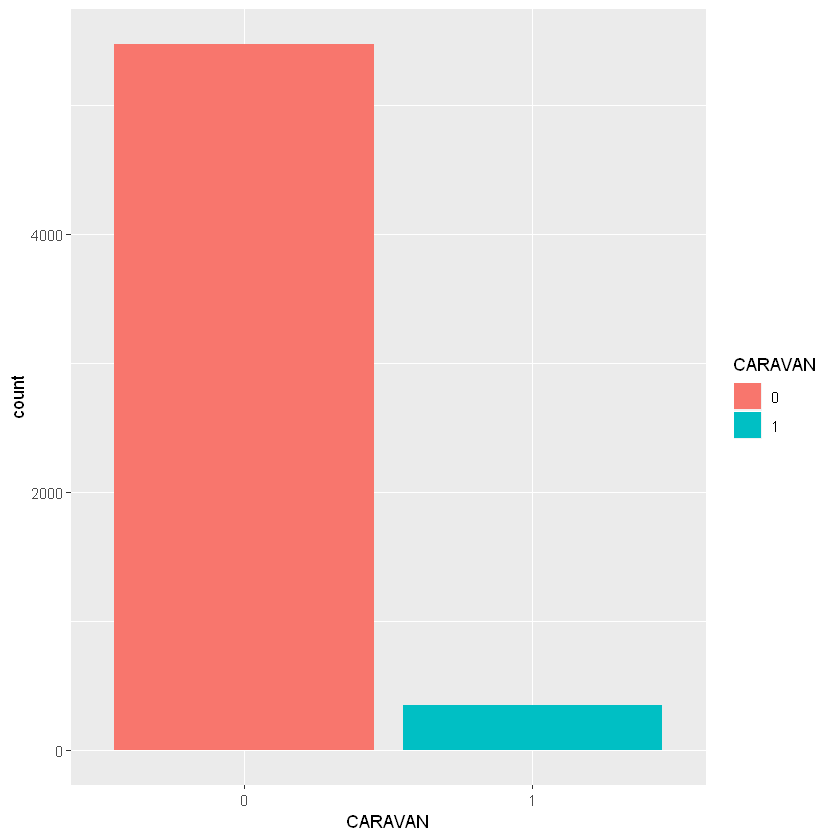

In [8]:
ggplot(train_data,aes(factor(V86))) + 
    geom_bar(aes(fill = factor(V86))) + 
    labs(x="CARAVAN") +
    scale_fill_discrete(name = "CARAVAN")

In short, there are 5474 customers who do not have caravan policy, and there are only 348 customers who have. Initial inference from this result is that customers in general tend to __not__ having a caravan policy.

#### After seeing the general view of distribution between those who purchased the caravan policy versus those who don't, next step is to look deeper how the predictors are divided based on the purchase of caravan policy

We will explore the first 5 predictors against the response variable for each predictor. In order to know the correlation for the other predictors, a correlation plot and matrix will be used later to see any correlation which ultimately choosing the best predictors for model fitting.<br>
The initial first 5 predictors are:
* V1 -> MOSTYPE (Customer Subtype)
* V2 -> MAANTHUI (Number of houses)
* V3 -> MGEMOMV (Avg size household)
* V4 -> MGEMLEEF (Average age)
* V5 -> MOSHOOFD (Customer Main Type)

#### 1. V1 - MOSTYPE (Customer Subtype)

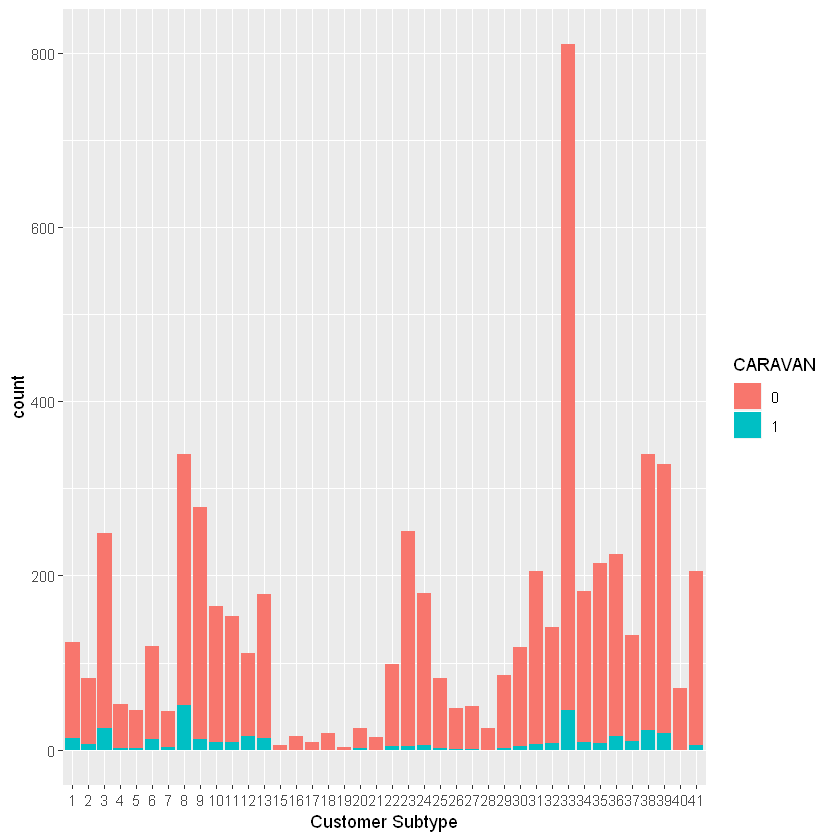

In [9]:
ggplot(train_data,aes(factor(V1))) + 
    geom_bar(aes(fill = factor(V86))) + 
    labs(x="Customer Subtype") +
    scale_fill_discrete(name = "CARAVAN")

##### Customers who purchased caravan policy

The training data set is dominated by customers with Customer Subtype = 33, which means Lower Class Large Families. These customer segment is one of the highest caravan policy purchasers. The other Customer Subtype who purchased the caravan policy is customer subtype 8, which are Middle Class Families. 

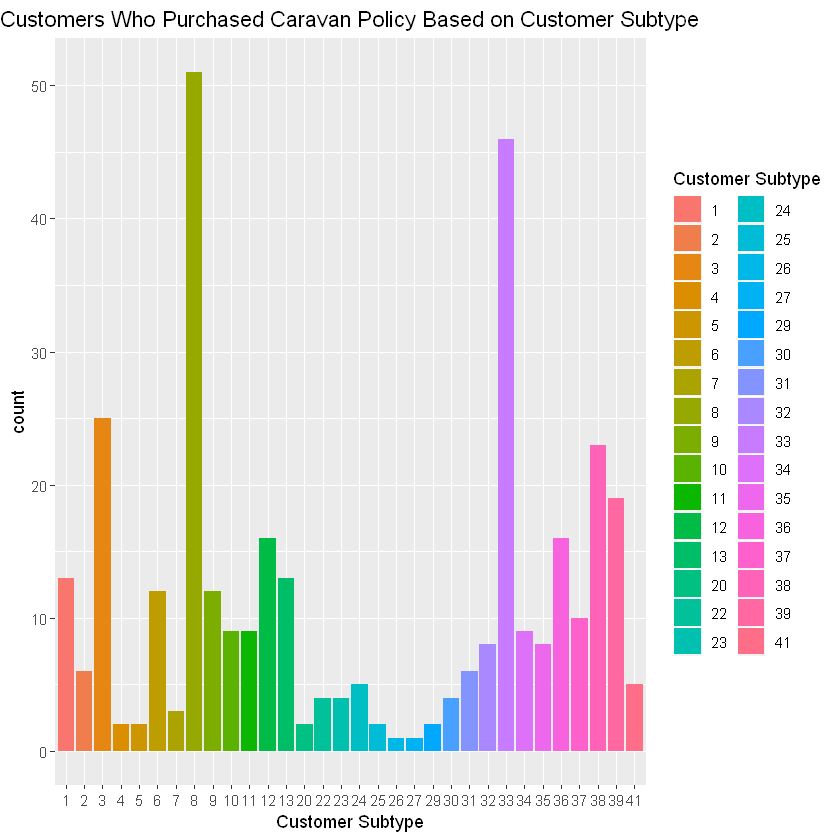

In [10]:
ggplot(train_data[train_data$V86 == 1,],aes(factor(V1))) + 
    geom_bar(aes(fill = factor(V1))) + 
    labs(x="Customer Subtype") +
    scale_fill_discrete(name = "Customer Subtype") +
    ggtitle("Customers Who Purchased Caravan Policy Based on Customer Subtype") + 
    theme(plot.title = element_text(hjust = 0.5))

In [11]:
# Customers with subtype = 8 who bought caravan policy
nrow(train_data[train_data$V1 == 8 & train_data$V86 == 1,])

# Customers with subtype = 33 who bought caravan policy
nrow(train_data[train_data$V1 == 33 & train_data$V86 == 1,])

[1] 51

[1] 46

There are 51 customers with Middle Class Families who bought the policy, while 46 people with Lower Class Family status bought the policy. <br>
Based on the observation, __customers from Lower to Middle Class Families tend to buy caravan policies.__

In [12]:
cor(train_data$V1, train_data$V86)

[1] -0.06938524

The customer subtype feature has a weak negative correlation against Caravan Policy Ownership with __-6.9%__. In the meantime, this variable will be used for further analysis with other variable analysis.

#### 2. V2 - MAANTHUI (Number of houses)

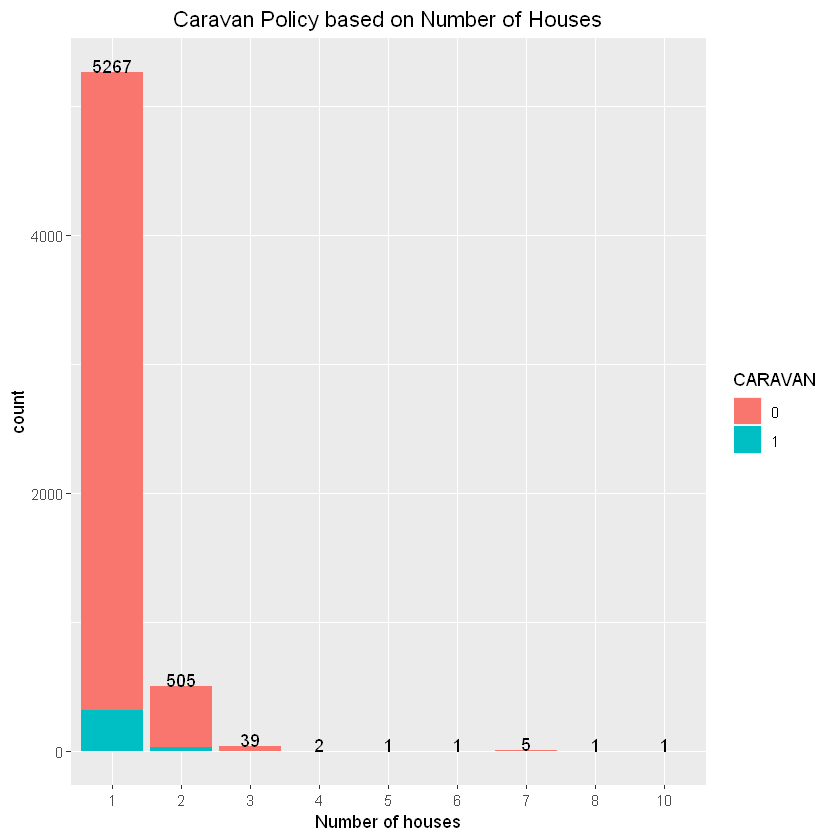

In [13]:
ggplot(train_data,aes(factor(V2))) + 
    geom_bar(aes(fill = factor(V86))) + 
    geom_text(stat='count', aes(label=..count..), vjust=0) + 
    labs(x="Number of houses") +
    scale_fill_discrete(name = "CARAVAN") + 
    ggtitle("Caravan Policy based on Number of Houses") +
    theme(plot.title = element_text(hjust = 0.5))

# nrow(train_data[train_data$V4 == 3, ])

It can be obviously seen that most of the customers, 5267 customers to be exact, only have 1 house. While there are still a few customers who have 7 houses, and only 1 customer has 10 houses. The plot is highly right skewed. Because the skewness, we won't be able to predict based on this variable, otherwise it would make a biased prediction.

In [14]:
cor(train_data[,"V2"], train_data[,"V86"])

[1] -0.009809028

Furthermore, looking at the correlation coefficient of V2 (number of houses) against V86 (Purchased or Not) is really low, __-0.9%__ to be exact, we shouldn't include this variable when fitting a model.

#### 3. V3 - MGEMOMV (Average size household)

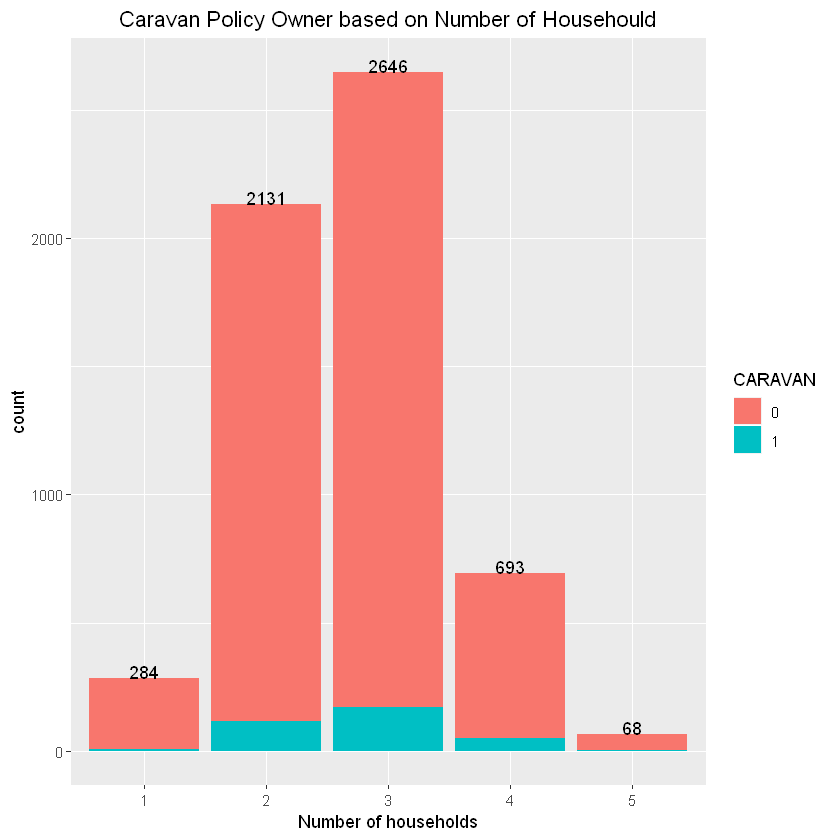

In [15]:
ggplot(train_data,aes(factor(V3))) + 
    geom_bar(aes(fill = factor(V86))) + 
    geom_text(stat='count', aes(label=..count..), vjust=0) + 
    labs(x="Number of households") +
    scale_fill_discrete(name = "CARAVAN") + 
    ggtitle("Caravan Policy Owner based on Number of Househould") +
    theme(plot.title = element_text(hjust = 0.5))

In [16]:
# Customers who bought caravan policy with 2 households
nrow(train_data[train_data$V3 == 2 & train_data$V86 == 1, ])

# Customers who bought caravan policy with 3 households
nrow(train_data[train_data$V3 == 3 & train_data$V86 == 1, ])

# Customers who bought caravan policy with 4 households
nrow(train_data[train_data$V3 == 4 & train_data$V86 == 1, ])

[1] 115

[1] 171

[1] 50

Based on the above plot, most customers have 2 or 3 households in their houses. 3 household is the most common appearance in the data with 2646 customers belong in this group, while 2131 customers have 2 household in their houses.<br> 
171 customers out of 2646 who have 3 households have the most caravan policy ownership. Followed by 115 customers out of 2131 who have 2 households bought the policy. And only 50 customers purchased caravan policy who have 4 households.

In [17]:
cor(train_data$V3, train_data$V86)

[1] 0.03557316

Although the number of household correlation is not as high as customer subtype; with only 3.5% compared -6.9%, it still can be included in the model fitting procedure, because it is relatively higher than number of houses.

#### 4. V4 - MGEMLEEF (Average Age)

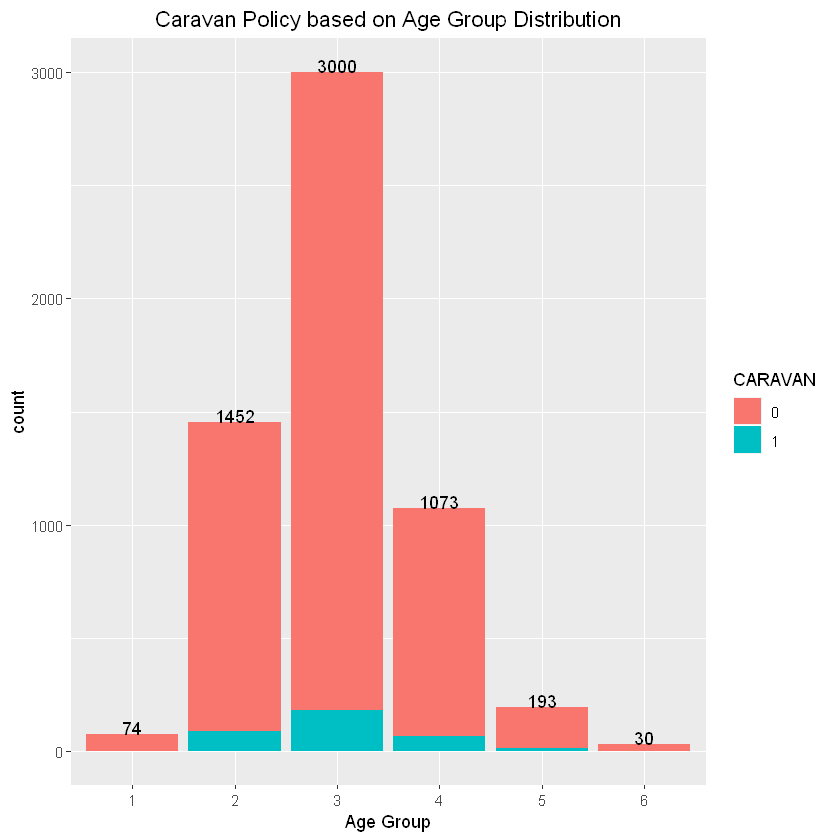

In [18]:
ggplot(train_data,aes(factor(V4))) + 
    geom_bar(aes(fill = factor(V86))) + 
    geom_text(stat='count', aes(label=..count..), vjust=0) + 
    labs(x="Age Group") +
    scale_fill_discrete(name = "CARAVAN") + 
    ggtitle("Caravan Policy based on Age Group Distribution") +
    theme(plot.title = element_text(hjust = 0.5))


In [19]:
# Number of customers who purchased caravan policy in age group 2
nrow(train_data[train_data$V4 == 2 & train_data$V86 == 1,])

# Number of customers who purchased caravan policy in age group 3
nrow(train_data[train_data$V4 == 3 & train_data$V86 == 1,])

# Number of customers who purchased caravan policy in age group 4
nrow(train_data[train_data$V4 == 4 & train_data$V86 == 1,])

[1] 87

[1] 183

[1] 64

As can be seen from the Customer Distribution based on Age Group plot, as many as 3000 customers is from Age Group 3, meaning customers whose age ranging from 40-50 years old. Furthermore, 183 people from this age group purchased caravan policy, which makes them the highest number of purchaser, followed by 87 customers in age group 2 (30-40 years old), and 64 customers in age group 4 (50-60 years old)

In [20]:
age_group <- unique(train_data$V4)

age_group_ratio <- data.frame('age_group' = NULL, 'ratio' = NULL)

for (i in 1:length(age_group)){
    # TOtal customer in each age_group
    total_customer <- nrow(train_data[train_data$V4 == age_group[i],])
    
    # Total customer who bought in each age_group
    bought <- nrow(train_data[train_data$V4 == age_group[i] & train_data$V86 == 1,])
    
    age_group_ratio[i, "age_group"] <- age_group[i]
    age_group_ratio[i, "ratio"] <- round((bought / total_customer) * 100 , 2)
}

In [21]:
age_group_ratio[order(age_group_ratio$age_group), ]

,age_group,ratio
3,1,1.35
1,2,5.99
2,3,6.10
4,4,5.96
5,5,6.22
6,6,3.33


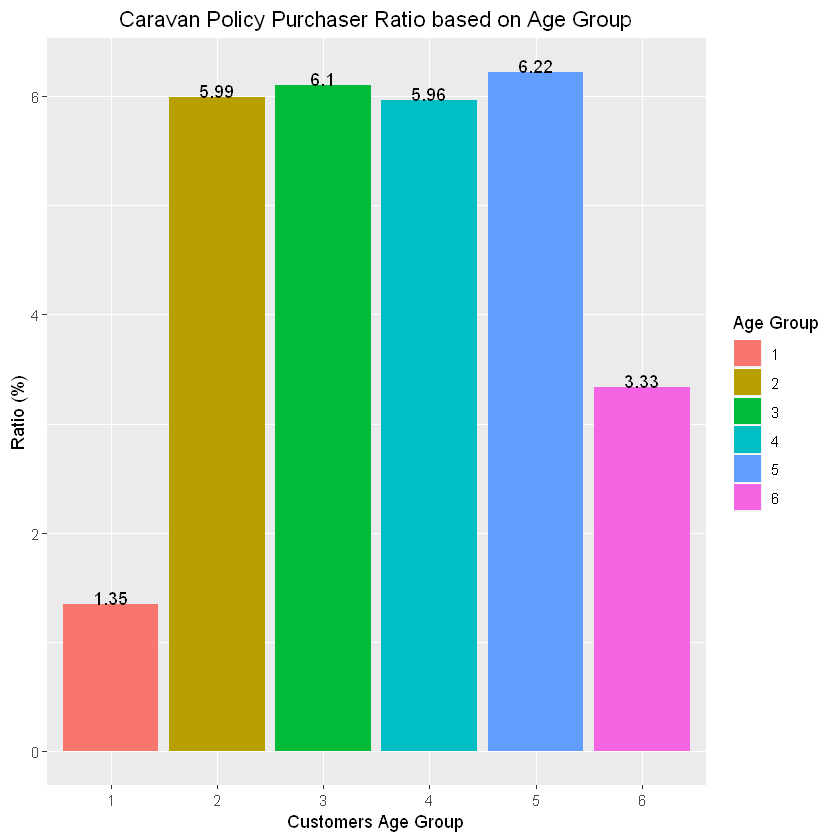

In [22]:
ggplot(age_group_ratio,aes(x = factor(age_group), y = ratio)) + 
    geom_bar(stat = "identity",aes(fill = factor(age_group))) + # aes(fill = factor(age_group))
    geom_text(aes(label = ratio), vjust = 0) +
    labs(x="Customers Age Group", y = "Ratio (%)") +
    scale_fill_discrete(name = "Age Group") +
    ggtitle("Caravan Policy Purchaser Ratio based on Age Group") + 
    theme(plot.title = element_text(hjust = 0.5))

Looking at a slightly different angle, rather than just looking which age group has the highest number of customers who bought the caravan policy, it would be better to compare the value based on ratio. The above plot shows that customers with age group 5 (60-70 years old) has purchased more caravan policy than the other age group. 
__<br>Based on these two observations, although 183 customers in 40-50 years old group purchased the policy, in ratio, 6.22% of people from age group 60-70 years old has purchased more policy, compared to 6.1% of people in age group 40-50 years old__
<br> In general, customers whose age are from 30 to 70 years old bought caravan insurance policy.

In [23]:
cor(train_data$V4, train_data$V86)

[1] 0.004490697

The correlation coefficient of Age Group against caravan policy ownership is really low with only __0.4%__, thus when fitting a model, this feature will not be included.

#### 5. V5 - MOSHOOFD (Customer Main Type)

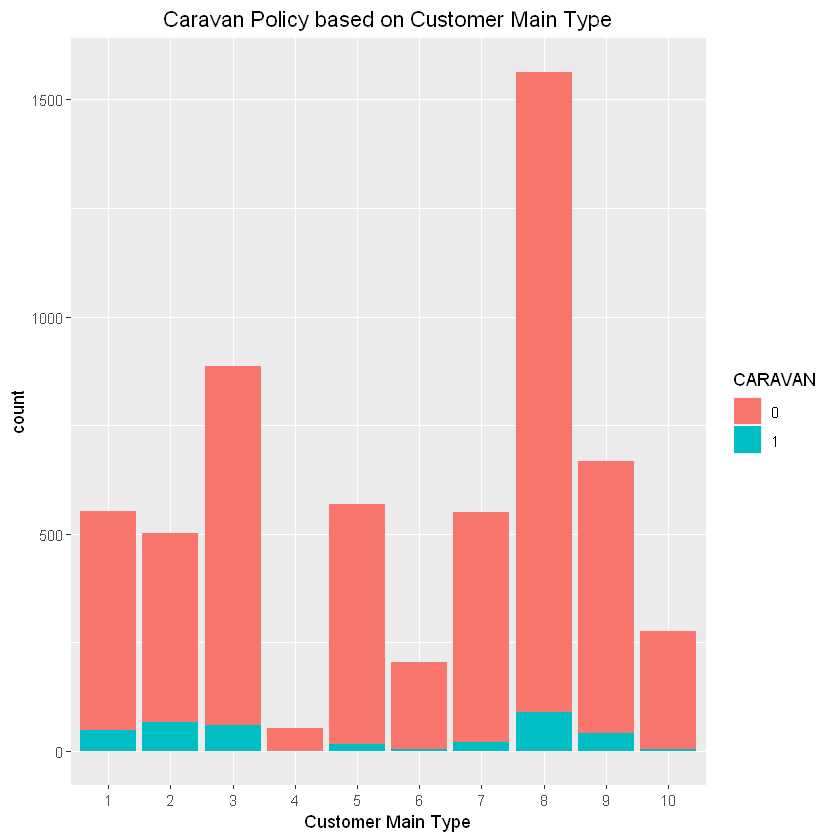

In [24]:
ggplot(train_data,aes(factor(V5))) + 
    geom_bar(aes(fill = factor(V86))) + 
    labs(x="Customer Main Type") +
    scale_fill_discrete(name = "CARAVAN") + 
    ggtitle("Caravan Policy based on Customer Main Type") +
    theme(plot.title = element_text(hjust = 0.5))


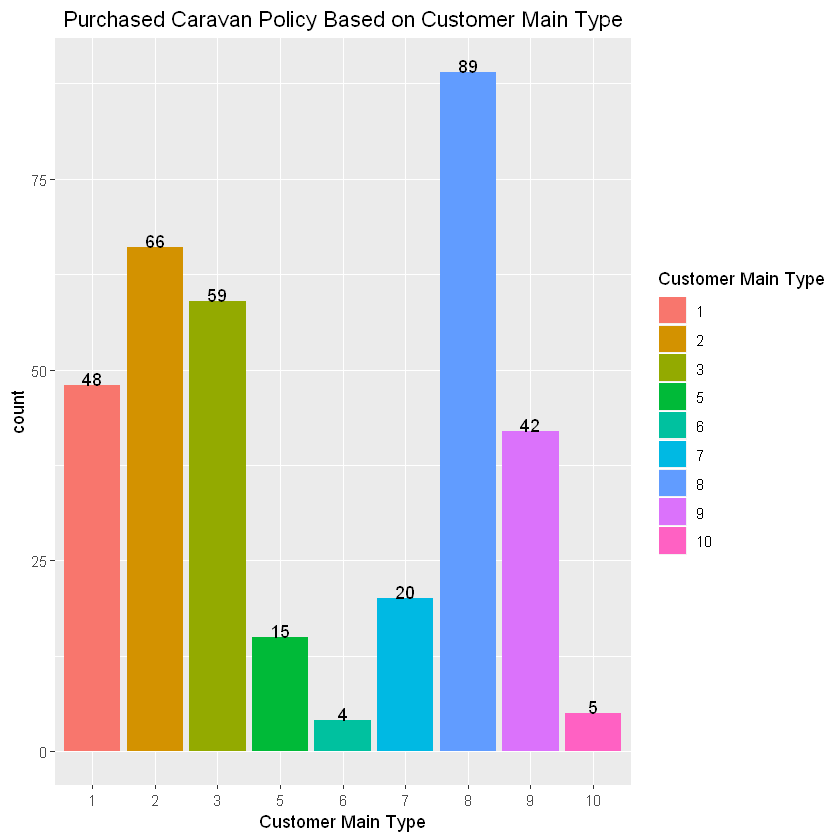

In [25]:
ggplot(train_data[train_data$V86 == 1,],aes(factor(V5))) + 
    geom_bar(aes(fill = factor(V5))) + 
    geom_text(stat='count', aes(label=..count..), vjust=0) + 
    labs(x="Customer Main Type") +
    scale_fill_discrete(name = "Customer Main Type") +
    ggtitle("Purchased Caravan Policy Based on Customer Main Type") + 
    theme(plot.title = element_text(hjust = 0.5))

In [26]:
cust_main_type <- sort(unique(train_data$V5))

cust_main_type_ratio <- data.frame('cust_main_type' = NULL, 'ratio' = NULL)

for (i in 1:length(cust_main_type)){
    # TOtal customer in each customer Main Type
    total_customer <- nrow(train_data[train_data$V5 == cust_main_type[i],])
    
    # Total customer who bought in each Customer Main Type
    bought <- nrow(train_data[train_data$V5 == cust_main_type[i] & train_data$V86 == 1,])
    
    cust_main_type_ratio[i, "cust_main_type"] <- cust_main_type[i]
    cust_main_type_ratio[i, "ratio"] <- round((bought / total_customer) * 100 , 2)
}

cust_main_type_ratio

cust_main_type,ratio
1,8.70
2,13.15
3,6.66
4,0.00
5,2.64
6,1.95
7,3.64
8,5.69
9,6.30
10,1.81


In [27]:
table(train_data[train_data$V5 == 2, "V86"])
table(train_data[train_data$V5 == 1, "V86"])
table(train_data[train_data$V5 == 3, "V86"])
table(train_data[train_data$V5 == 9, "V86"])
table(train_data[train_data$V5 == 8, "V86"])


  0   1 
436  66 


  0   1 
504  48 


  0   1 
827  59 


  0   1 
625  42 


   0    1 
1474   89 

Although from the plot customers with main type 8 (Family with grown ups) have purchased more caravan policy than the other groups, in ratio this number is smaller compared to those with main type 2 (Driven Growers) with 13.15% from this group bought caravan policy. 

Just like the previous analysis, we will see the correlation for this variable against the response variable.

In [28]:
cor(train_data$V5, train_data$V86)

[1] -0.06929983

#### Surprisingly *customer main type* has the same correlation number with *customer sub type* with __-6.9%__ for both. This needs to be checked further.

,V1,V2,V3,V4,V5,V86
V1,1.000000000,-0.038721258,-0.02199697,0.009454422,0.992671874,-0.069385237
V2,-0.038721258,1.000000000,0.01010224,0.056974604,-0.045816774,-0.009809028
V3,-0.021996966,0.010102243,1.00000000,-0.328257249,0.016115371,0.035573157
V4,0.009454422,0.056974604,-0.32825725,1.000000000,0.003872334,0.004490697
V5,0.992671874,-0.045816774,0.01611537,0.003872334,1.000000000,-0.069299830
V86,-0.069385237,-0.009809028,0.03557316,0.004490697,-0.069299830,1.000000000


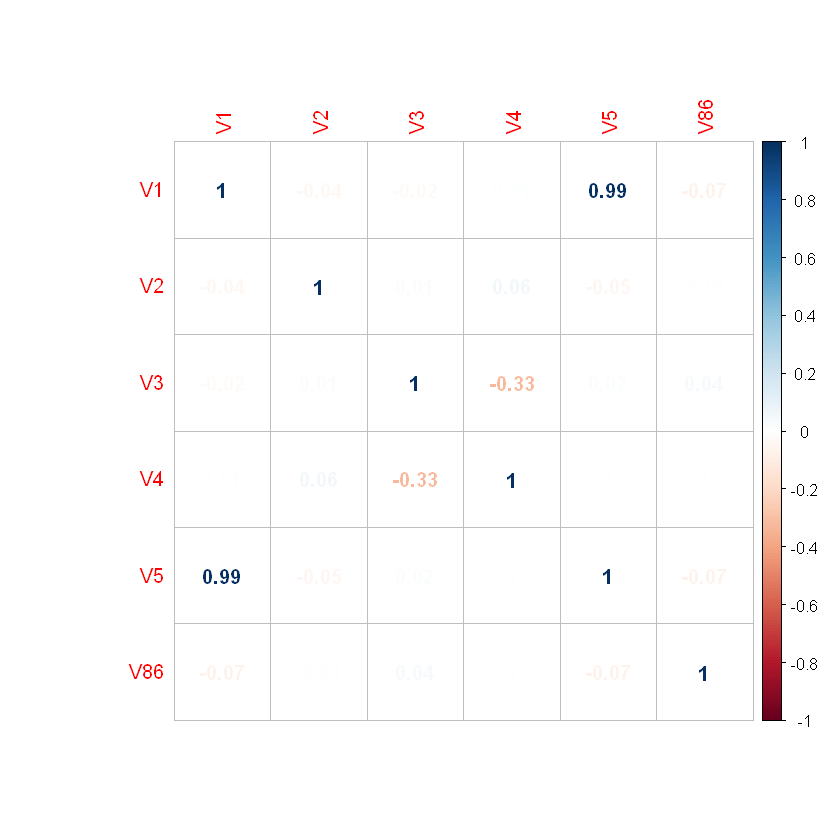

In [29]:
cor(train_data[, c("V1","V2","V3","V4","V5","V86")])
corrplot(cor(train_data[, c("V1","V2","V3","V4","V5","V86")]), method = "number")

Sure enough, V1 (Customer Sub type) and V5 (Customer main type) has the strongest positive correlation. These 2 features should not be included in model fitting together. It is either discard one of them, or completely discard these 2 features when model fitting. One of the reasonable ways to choose which feature to be included is by looking at the standard deviation between those 2.

In [30]:
describe(train_data[,c("V1", "V5")])

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
V1,1,5822,24.253349,12.84671,30,24.984113,11.8608,1,41,40,-0.4348463,-1.352676,0.16836650
V5,2,5822,5.773617,2.85676,7,5.901245,2.9652,1,10,9,-0.3313584,-1.345464,0.03744015


From the above statistic summary, V1 has way more standard deviance, which would not cause bias prediction at the end. <br>__Thus, we include V1 in the initial modelling process and discard V5.__ <br>
The new potential predictors are:
* V1
* V15
* V18
* V30
* V31
* V37
* V43
* V47

Combining prior results from the first five variables, the most likely customers who would purchase caravan policy are the ones with these characteristics:
* Customers with __Lower to Middle Class Families__
* Customers with only __having 1 house__
* Customers who have __2 or 3 households__ 
* Those who are between __30-70 years old__
* Those who are __Driven Growers or Family with grown ups__

Obviously, the above conclusion cannot represent the overall prediction result and we need to find other meaningful predictors. If we continue to find correlation by plotting each feature against the target variable, it would be time consuming and not efficient. The better way is to get a correlation matrix of all features against the response variable.

### Correlation Matrix

#### Correlation matrix between predictors

In [31]:
# Excluding V2, V3, V4, V5
train_data_2 <- data.frame(train_data[, -c(2,3,4,5)])
dim(train_data_2)

# Without target variable
# cor_td2 <- cor(subset(train_data_2, select = -V86))
cor_td2 <- cor(train_data_2[ , !colnames(train_data_2) %in% c('V86')])

summary(cor_td2[upper.tri(cor_td2)])


[1] 5822   82

      Min.    1st Qu.     Median       Mean    3rd Qu.       Max. 
-0.9995539 -0.0153264 -0.0005856  0.0090025  0.0254924  0.9875786 

After excluding some variables that have very low correlation to the target variable, a high correlation between the rest of the predictors need to be found to avoid multicollinearity. From the above summary, it can be seen that from finding the correlation between the rest of the predictors, there are still a strong positive correlation with __98.7%__ and there is also a strong negative correlation with __-99.95%__. It would be very exhaustive to find which variables have high correlation one by one, rather we will find them using findCorrelation function to cut off those who have high correlation.

In [32]:
high_correlation <- findCorrelation(cor_td2, cutoff = 0.75, names = TRUE)

high_correlation

[1] "V36" "V31" "V10" "V59" "V52" "V46" "V65" "V74" "V48" "V66" "V72" "V47"
[13] "V54" "V85" "V76" "V79" "V71" "V78" "V62" "V63" "V77" "V82" "V70" "V60"

The potential high correlation are the above variables. Before discarding any of them, check how they correlate with the target variable.

In [33]:
target_cor_df <- data.frame(V86 = cor(train_data_2[,sort(high_correlation)], train_data_2[, "V86"]))

dim(target_cor_df)
target_cor_df[order(target_cor_df$V86,decreasing = T),,drop=F]

[1] 24  1

,V86
V47,0.1509097148
V82,0.1056995045
V59,0.0944459897
V65,0.0893874727
V31,0.0784289165
V10,0.0702638279
V85,0.0666578513
V36,0.0575181930
V76,0.0371176230
V78,0.0335484032


The result above indicates that there are variables though having high correlation between other predictors, they are still relatively highly correlated with the response variable. The excluded variables are the ones with correlation coefficient lower than __0.1__ or __10%__.

In [34]:
excluded_vars <- row.names(target_cor_df[target_cor_df$V86 < 0.1, ,drop=F])
length(excluded_vars)
excluded_vars

[1] 22

[1] "V10" "V31" "V36" "V46" "V48" "V52" "V54" "V59" "V60" "V62" "V63" "V65"
[13] "V66" "V70" "V71" "V72" "V74" "V76" "V77" "V78" "V79" "V85"

Above are the variables that will be excluded.

#### Correlation matrix for predictors against target variable

It has been found from the previous finding that V2, V3, V4, and V5 are excluded as being the independent variables due to __lack of correlation towards the response variable__, and there are 22 variables which have been excluded due to __high correlation towards the other predictors__. In total 26 variables have been excluded so far. <br>
The next step is trying to find the good predictors using correlation matrix. A measure for good predictors are the ones that do not have high correlation among them.

In [35]:
# Excluding 'V10' 'V31' 'V36' 'V46' 'V48' 'V52' 'V54' 'V59' 'V60' 'V62' 'V63' 'V65' 'V66' 'V70' 'V71' 'V72' 'V74' 'V76' 'V77' 'V78' 'V79' 'V85'

train_data_3 <- data.frame(train_data_2[, !colnames(train_data_2) %in% excluded_vars])
dim(train_data_3)
head(train_data_3)
# cor(train_data_3)

[1] 5822   60

V1,V6,V7,V8,V9,V11,V12,V13,V14,V15,⋯,V68,V69,V73,V75,V80,V81,V82,V83,V84,V86
33,0,5,1,3,0,2,1,2,6,,1,0,0,0,1,0,0,0,0,0
37,1,4,1,4,2,2,0,4,5,,0,0,0,0,1,0,0,0,0,0
37,0,4,2,4,2,4,4,4,2,,1,0,0,0,1,0,0,0,0,0
9,2,3,2,4,2,2,2,3,4,,1,0,0,0,1,0,0,0,0,0
40,1,4,1,4,1,2,2,4,4,,0,0,0,0,1,0,0,0,0,0
23,0,5,0,5,6,3,3,5,2,,1,0,0,0,0,0,0,0,0,0


In [36]:
cor.test(train_data_3[,"V68"], train_data_3[ , "V86"])$estimate

cor 
0.1442105

In [37]:
cor_response <- data.frame("ind_var" = colnames(train_data_3), "dep_var" = "V86", "cor_coeff" = 0, "p_values" = 0)

for (i in colnames(train_data_3)){
    cor_test <- cor.test(train_data_3[, i], train_data_3[, "V86"])
    
    cor_response[cor_response$ind_var == i, "cor_coeff"] <- cor_test$estimate
    cor_response[cor_response$ind_var == i, "p_values"] <- cor_test$p.value
}


In [38]:
cor_response[order(cor_response$cor_coeff, decreasing = T),]

,ind_var,dep_var,cor_coeff,p_values
60,V86,V86,1.0000000000,0.000000e+00
39,V47,V86,0.1509097148,5.289577e-31
51,V68,V86,0.1442104645,1.982076e-28
57,V82,V86,0.1056995045,6.164884e-16
37,V44,V86,0.0964626877,1.632091e-13
36,V43,V86,0.0959382627,2.206680e-13
48,V61,V86,0.0913611589,2.865756e-12
35,V42,V86,0.0901853820,5.428259e-12
11,V16,V86,0.0846353376,9.926323e-11
26,V32,V86,0.0699738688,9.064018e-08


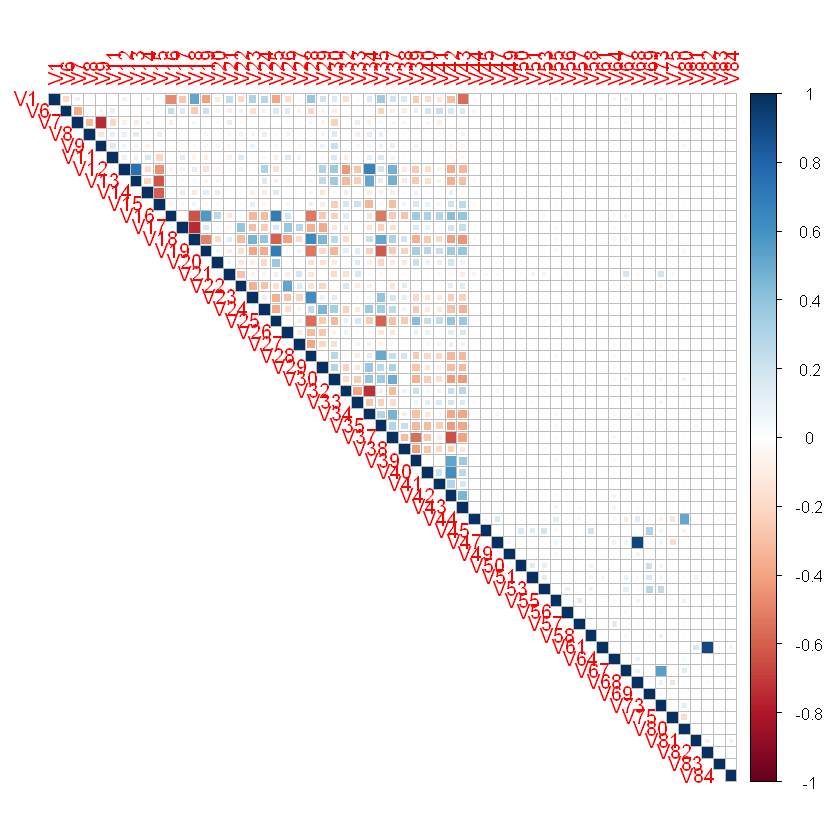

In [39]:
corrplot(cor(subset(train_data_3 , select = c(-V86))), method = "square", type = "upper")

The above plot shows that there are still some predictors that are highly correlated with each other. The variables that need to be checked further are:
* V7 and V9
* V12 and V13
* V17 and V18
* V32 and V34
* V47 and V68
* V61 and V82

In [40]:
cor(subset(train_data_3, select = -V86)[ , c("V7", "V9", "V12", "V13", "V17", "V18", "V32", "V34", "V47", "V68", "V61", "V82")])

,V7,V9,V12,V13,V17,V18,V32,V34,V47,V68,V61,V82
V7,1.00000000,-0.74189451,-0.084050503,-0.11592168,-0.015809470,0.056480934,-0.01833289,-0.082429543,0.019499655,0.027986801,0.018349034,0.018467804
V9,-0.74189451,1.00000000,0.071837834,0.06464249,-0.036979585,0.042878421,0.01317454,0.055051189,-0.018464726,-0.024372533,-0.023801543,-0.026407349
V12,-0.08405050,0.07183783,1.000000000,0.74564227,-0.085847019,0.129615816,-0.43255901,0.661457629,-0.033224324,-0.032756050,0.002575251,-0.006310754
V13,-0.11592168,0.06464249,0.745642269,1.00000000,-0.035947774,0.045244170,-0.32562008,0.516173571,-0.044845685,-0.043610989,-0.011760899,-0.018787112
V17,-0.01580947,-0.03697958,-0.085847019,-0.03594777,1.000000000,-0.747581568,0.11417701,-0.143919318,0.007662509,0.010056606,0.019423140,0.019963972
V18,0.05648093,0.04287842,0.129615816,0.04524417,-0.747581568,1.000000000,-0.18397170,0.225098481,-0.003571270,-0.009361827,-0.018884358,-0.019264256
V32,-0.01833289,0.01317454,-0.432559012,-0.32562008,0.114177011,-0.183971700,1.00000000,-0.734563719,0.047385131,0.047176998,-0.019223185,-0.010046326
V34,-0.08242954,0.05505119,0.661457629,0.51617357,-0.143919318,0.225098481,-0.73456372,1.000000000,-0.053166448,-0.057413300,0.009227026,0.003181950
V47,0.01949965,-0.01846473,-0.033224324,-0.04484569,0.007662509,-0.003571270,0.04738513,-0.053166448,1.000000000,0.916154488,0.024613219,0.031728496
V68,0.02798680,-0.02437253,-0.032756050,-0.04361099,0.010056606,-0.009361827,0.04717700,-0.057413300,0.916154488,1.000000000,0.043864415,0.046364183


Based on the correlation matrix, most of the correlations are fine with still being lower than 0.75 as previously set to be the cut-off base line. However, there are 2 correlations that still higher than 0.9 and those are between __V47 & V68__ and __V61 & V82__

In [41]:
cor(train_data_3[ , c("V47", "V61", "V68", "V82")], train_data_3[ , "V86"])

V47,0.15090971
V61,0.09136116
V68,0.14421046
V82,0.10569950


Looking at the correlation against the response variable V86, 
* V47 has higher correlation coefficient compared to V68
* V82 has higher correlation coefficient compared to V61

Thus, __V61__ and __V68__ will be excluded in the next step

In [42]:
# Excluding V61 and V68
train_data_4 <- data.frame(train_data_3[ , !colnames(train_data_3) %in% c("V61","V68")])
dim(train_data_4)

[1] 5822   58

#### POTENTIAL PREDICTORS NUMBER 2

After trimming the multicollinearity among the predictors and finding the better correlation with the response variable, the second potential predictors are mentioned below.

In [43]:
colnames(train_data_4)

[1] "V1"  "V6"  "V7"  "V8"  "V9"  "V11" "V12" "V13" "V14" "V15" "V16" "V17"
[13] "V18" "V19" "V20" "V21" "V22" "V23" "V24" "V25" "V26" "V27" "V28" "V29"
[25] "V30" "V32" "V33" "V34" "V35" "V37" "V38" "V39" "V40" "V41" "V42" "V43"
[37] "V44" "V45" "V47" "V49" "V50" "V51" "V53" "V55" "V56" "V57" "V58" "V64"
[49] "V67" "V69" "V73" "V75" "V80" "V81" "V82" "V83" "V84" "V86"

## 2.) Model Fitting

There will be three pontentials predictors that have been gathered from the previous sections to be fitted to create a model. In addition to that, there will also be a few different methods for feature selection along the way.

### 2.1) Logistic Regression

#### 2.1.1) GLM_1 with Predictors Number 1

Before fitting a model using the first potential predictors, it is better to shuffle the data first to avoid the machine to memorize the training data.

In [44]:
# Shuffle the index of training data
set.seed(1234)
ix_shuffle <- sample(1:nrow(train_data), nrow(train_data))

In [45]:
# Get only the first potential predictors
glm_1_data <- data.frame(subset(train_data, select = c("V1", "V15", "V18", "V30", "V31", "V37", "V43", "V47", "V86")))

# Get shuffled index
glm_1_data <- glm_1_data[ix_shuffle, ]
dim(glm_1_data)
head(glm_1_data)

[1] 5822    9

,V1,V15,V18,V30,V31,V37,V43,V47,V86
662,8,7,2,1,8,1,7,6,1
3623,8,7,2,1,8,1,7,5,0
3546,35,5,5,5,4,0,5,0,0
3628,41,6,6,0,9,5,4,0,0
5009,33,5,7,2,7,0,3,6,0
3725,37,3,2,8,1,1,4,0,0


In [46]:
glm_1 <- glm(V86 ~ ., data = glm_1_data, family = binomial(link = "logit"))
glm_1_summ <- summary(glm_1)
glm_1_summ


Call:
glm(formula = V86 ~ ., family = binomial(link = "logit"), data = glm_1_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.8206  -0.4076  -0.2800  -0.1919   3.1394  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  1.179e+02  2.922e+03   0.040  0.96782    
V1           7.969e-04  6.098e-03   0.131  0.89603    
V15          7.797e-03  3.179e-02   0.245  0.80623    
V18         -1.023e-01  3.227e-02  -3.170  0.00152 ** 
V30         -1.353e+01  3.247e+02  -0.042  0.96676    
V31         -1.348e+01  3.247e+02  -0.042  0.96687    
V37         -5.488e-02  3.687e-02  -1.489  0.13659    
V43          9.119e-02  4.289e-02   2.126  0.03349 *  
V47          2.484e-01  2.343e-02  10.599  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2635.5  on 5821  degrees of freedom
Residual deviance: 2410.8  on 5813  degrees of freedom
A

In [47]:
# Log likelihood for the null model
ll_1_null <- glm_1$null.deviance/-2

# Log likelihood for the proposed model
ll_1_proposed <- glm_1$deviance/-2

r_squared_1 <- (ll_1_null - ll_1_proposed) / ll_1_null
r_squared_1

[1] 0.08528935

From the summary call of glm method using the first set of predictors, it can be summarized that:
* The median of the deviance result is close to zero, however the distribution is __not__ symmetrical, that means the residuals are not normally dispersed. In other words, from choosing the first predictors made the model __badly fitted__.
* Looking at the estimate coefficients, 4 predictors have positive influence towards the response variable, while the other 4 have negative influences towards the response variable
* In the coefficients part, most of the variables do not show significance to the response variable because they have high p-values. If we set the $\alpha = 0.05$, then the variables that are statistically significance are __V18__, __V43__, and __V47__
* The Residual Deviance is lower than the Null Deviance, meaning that the model predicts better with those predictors compared to only having the intercept in the model
* The AIC (the adjusted residuals deviance) is __2428.8__ is not meaningful at the moment, but we will compare the AIC with another model. If we fit another model with different predictors and the AIC is lower, this means that the newly created model fits better.

After displaying the summary of the fitted model, the $R^2$ was calculated using the log likelihood of null model and log likelihood of the current model. The result shows that the $R^2$ is only 0.085. In the scale of 0 for a bad model, to 1 for a good model, the result indicates that currently it is not a good model. 

In [48]:
anova(glm_1, test = "Chisq")

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,5821,2635.540,NA
V1,1,27.285267,5820,2608.255,1.755439e-07
V15,1,6.282736,5819,2601.972,1.219197e-02
V18,1,25.066414,5818,2576.906,5.538923e-07
V30,1,13.708962,5817,2563.197,2.134336e-04
V31,1,4.946597,5816,2558.250,2.614207e-02
V37,1,4.745915,5815,2553.505,2.936792e-02
V43,1,4.533870,5814,2548.971,3.323040e-02
V47,1,138.213760,5813,2410.757,6.543956e-32


In [49]:
with(glm_1, pchisq(null.deviance - deviance, df.null - df.residual, lower.tail = FALSE))

[1] 3.754687e-44

Analyzing from the *anova()* test, the residual deviance decreases each time adding a variable. From the null model, the residual deviance had a quite big drop after adding V1 in the predictor. After that, adding more variables did not make the residual deviance dropped as big as the first one. Until after adding V47 to the model, the residual deviance steeply dropped over 138 points. This also indicated by the lowest p-value in the model, V47 had made a huge impact on the residual deviance of the model.

The one below anova test is a Chisq test to further prove that by having low p-value (where $\alpha = 0.05$), __the fitted model is better the the null model.__

#### 2.1.2) GLM_2 with All Predictors

It would be a good baseline to fit a model using all of the predictors. Obviously, it will be prone to overfitting and large variance. Nevertheless, it is worth to try for comparison against the previous model.

In [50]:
glm_2_data <- train_data[ix_shuffle, ]
head(glm_2_data)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86
662,8,1,3,3,2,1,5,1,3,7,,0,0,0,1,0,0,0,0,0,1
3623,8,1,4,3,2,1,5,1,3,7,,0,0,0,1,0,0,0,0,0,0
3546,35,1,4,3,8,0,4,1,5,6,,0,0,0,0,0,0,0,0,0,0
3628,41,1,4,2,10,4,4,0,2,6,,0,0,0,0,0,0,0,0,0,0
5009,33,2,3,2,8,0,7,0,2,7,,0,0,0,1,0,0,0,0,0,0
3725,37,1,2,3,8,1,5,3,2,4,,0,0,0,1,0,0,0,0,0,0


In [51]:

glm_2 <- glm(V86 ~ ., data = glm_2_data, family = binomial(link = "logit"))

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

In [52]:
summary(glm_2)


Call:
glm(formula = V86 ~ ., family = binomial(link = "logit"), data = glm_2_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.7047  -0.3711  -0.2450  -0.1588   3.2916  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  2.542e+02  1.116e+04   0.023  0.98183    
V1           6.580e-02  4.624e-02   1.423  0.15468    
V2          -1.832e-01  1.927e-01  -0.951  0.34157    
V3          -2.696e-02  1.399e-01  -0.193  0.84723    
V4           2.096e-01  1.016e-01   2.063  0.03911 *  
V5          -2.767e-01  2.076e-01  -1.333  0.18247    
V6          -1.142e-01  1.069e-01  -1.068  0.28535    
V7          -1.910e-02  1.177e-01  -0.162  0.87112    
V8          -1.618e-02  1.055e-01  -0.153  0.87818    
V9          -6.817e-02  1.113e-01  -0.612  0.54024    
V10          2.310e-01  1.566e-01   1.475  0.14031    
V11          8.509e-02  1.466e-01   0.580  0.56169    
V12          1.467e-01  1.562e-01   0.939  0.34759    
V13         -8.29

Some summary regarding the second model glm_2:
* The Deviance Residuals for glm_2 is slightly better than the glm_1. The median of the glm_2 summary is still close to zero, and the distribution is closely to being symmetrical compared to the glm_1 seen by the Min is closer to Max. With that being said, this model is still __not good enough.__
* Looking at the p-values, variables that are significant towards the prediction of the response variable are __V4, V47, V55, V59, V76, V82__. <br>While __V18, V43__ are proven to be not significant in this model, unlike in the glm_1 model.
* The AIC score of the second model is lower than the first model. In glm_1 the AIC was __2428__, while glm_2 has __2415__. Though decreased, the score does not make a significant drop. We still need to find the AIC score as low as possible.
* Lastly, this model takes longer time to converge. 17 iterations compared to previous model with 15 iterations. Thus, glm_2 cost more than glm_1

In [53]:
# Log likelihood for the null model
ll_2_null <- glm_2$null.deviance/-2

# Log likelihood for the proposed model
ll_2_proposed <- glm_2$deviance/-2

r_squared_2 <- (ll_2_null - ll_2_proposed) / ll_2_null
r_squared_2

[1] 0.1487569

Althought the AIC score dropped insignificantly, the $R^2$ for the second model is relatively higher, which almost __doubled__ compared glm_1 model.

In [54]:
options(warn=-1)
anova_glm_2 <- anova(glm_2, test = "Chisq")

In [55]:
anova_glm_2[1:30 , ]
anova_glm_2[31:60 , ]
anova_glm_2[61:nrow(anova_glm_2), ]

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,5821,2635.540,NA
V1,1,27.28526663,5820,2608.255,1.755439e-07
V2,1,0.91869289,5819,2607.337,3.378184e-01
V3,1,6.28701676,5818,2601.049,1.216256e-02
V4,1,1.80788966,5817,2599.242,1.787616e-01
V5,1,1.96929699,5816,2597.272,1.605225e-01
V6,1,0.36926636,5815,2596.903,5.434044e-01
V7,1,7.08551332,5814,2589.818,7.770956e-03
V8,1,1.82848832,5813,2587.989,1.763062e-01
V9,1,0.60451334,5812,2587.385,4.368611e-01


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
V30,1,1.023533e+01,5791,2511.451,1.377762e-03
V31,1,8.194478e+00,5790,2503.256,4.201807e-03
V32,1,3.704174e+00,5789,2499.552,5.427652e-02
V33,1,2.313232e+00,5788,2497.239,1.282771e-01
V34,1,5.238446e-01,5787,2496.715,4.692063e-01
V35,1,1.893426e+00,5786,2494.822,1.688160e-01
V36,1,2.990401e+00,5785,2491.831,8.375941e-02
V37,1,7.224535e-01,5784,2491.109,3.953403e-01
V38,1,2.910865e-02,5783,2491.080,8.645284e-01
V39,1,5.251954e-01,5782,2490.555,4.686338e-01


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
V60,1,6.281299e-01,5761,2296.832,4.280421e-01
V61,1,1.873663e+01,5760,2278.096,1.500716e-05
V62,1,4.693886e+00,5759,2273.402,3.027011e-02
V63,1,2.057208e-01,5758,2273.196,6.501423e-01
V64,1,1.788235e+00,5757,2271.408,1.811414e-01
V65,1,2.006491e+00,5756,2269.401,1.566273e-01
V66,1,1.723332e-01,5755,2269.229,6.780465e-01
V67,1,5.837025e-02,5754,2269.171,8.090906e-01
V68,1,1.231688e-02,5753,2269.158,9.116311e-01
V69,1,1.335215e+00,5752,2267.823,2.478796e-01


From the above summary of glm_2, specially in p-value description, it turns out that V4, V55, V59, V76, V82 did not affect much in the anova test above, because the residual deviance barely dropped for each of those variables. That leaves the possible predictor to only having V47. However, only having 1 variable to predict will likely cause underfitting because the model built would be very simple.

In [56]:
glm(V86 ~ V47, data = glm_2_data, family = binomial(link = "logit"))


Call:  glm(formula = V86 ~ V47, family = binomial(link = "logit"), data = glm_2_data)

Coefficients:
(Intercept)          V47  
    -3.7198       0.2501  

Degrees of Freedom: 5821 Total (i.e. Null);  5820 Residual
Null Deviance:	    2636 
Residual Deviance: 2494 	AIC: 2498

Just out of curiosity, making a model with only having 1 predictor of V47 was performed. And sure enough the AIC score jumped much higher to 2498. This proves that by having only the most correlated variable as the predictor, did not make the model better. And in this case, the model is underfit.

#### 2.1.3) GLM_3 with Predictors Number 2

For a reminder, Predictors Number 2 are the ones that have been found through discarding multicollinearity and keeping those with high correlation against the response variable.

In [57]:
glm_3_data <- data.frame(train_data_4)

dim(glm_3_data)
head(glm_3_data)

[1] 5822   58

V1,V6,V7,V8,V9,V11,V12,V13,V14,V15,⋯,V67,V69,V73,V75,V80,V81,V82,V83,V84,V86
33,0,5,1,3,0,2,1,2,6,,0,0,0,0,1,0,0,0,0,0
37,1,4,1,4,2,2,0,4,5,,0,0,0,0,1,0,0,0,0,0
37,0,4,2,4,2,4,4,4,2,,0,0,0,0,1,0,0,0,0,0
9,2,3,2,4,2,2,2,3,4,,0,0,0,0,1,0,0,0,0,0
40,1,4,1,4,1,2,2,4,4,,0,0,0,0,1,0,0,0,0,0
23,0,5,0,5,6,3,3,5,2,,0,0,0,0,0,0,0,0,0,0


In [58]:
glm_3 <- glm(V86 ~ . , data = glm_3_data, family = binomial(link = "logit"))

In [59]:
summary(glm_3)


Call:
glm(formula = V86 ~ ., family = binomial(link = "logit"), data = glm_3_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.5620  -0.3790  -0.2534  -0.1698   3.2672  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -7.098219   2.275315  -3.120  0.00181 ** 
V1            0.006046   0.006550   0.923  0.35593    
V6           -0.093124   0.103851  -0.897  0.36988    
V7            0.007842   0.113131   0.069  0.94473    
V8            0.028852   0.101666   0.284  0.77657    
V9           -0.030251   0.106889  -0.283  0.77717    
V11          -0.138906   0.073453  -1.891  0.05861 .  
V12          -0.030978   0.060808  -0.509  0.61044    
V13          -0.036296   0.126056  -0.288  0.77340    
V14          -0.058842   0.129624  -0.454  0.64987    
V15          -0.057888   0.132968  -0.435  0.66331    
V16           0.002376   0.129933   0.018  0.98541    
V17          -0.098610   0.134920  -0.731  0.46485    
V18          -0.1

* From the third model, the summary statistic gives a promising result. There are more variables that have low p-values compared to previous ones. These variables are V44, V47, V58, V82, and V83.
* But in more promising way, the AIC score dropped from 2415 in glm_2 to 2407 in glm_3. Compared to glm_2, glm_3 is the best model so far, considering the level complexity is not high because 28 variables have been discarded, while in glm_2 the model used all of the predictors. Thus, this model has reduced the chance of overfitting to happen.

#### 2.1.4) Improving predictors using feature selection

Although the glm_3 model has a promising goodness of fit, however the predictors selected from the previous model need to be further improved. And by using other techniques to select another possible predictors, there might be even better model with lower AIC score. The techniques that will be used are:
* Forward step
* Backward step
* Lasso Regression 

#### <ol><ol><ol>__FORWARD STEP__</ol></ol></ol>

In [60]:
fwd_step_3 <- regsubsets(V86 ~ . , data = glm_3_data, nvmax = ncol(glm_3_data), method = "forward")

In [61]:
fwd_step_3_summ <- summary(fwd_step_3)

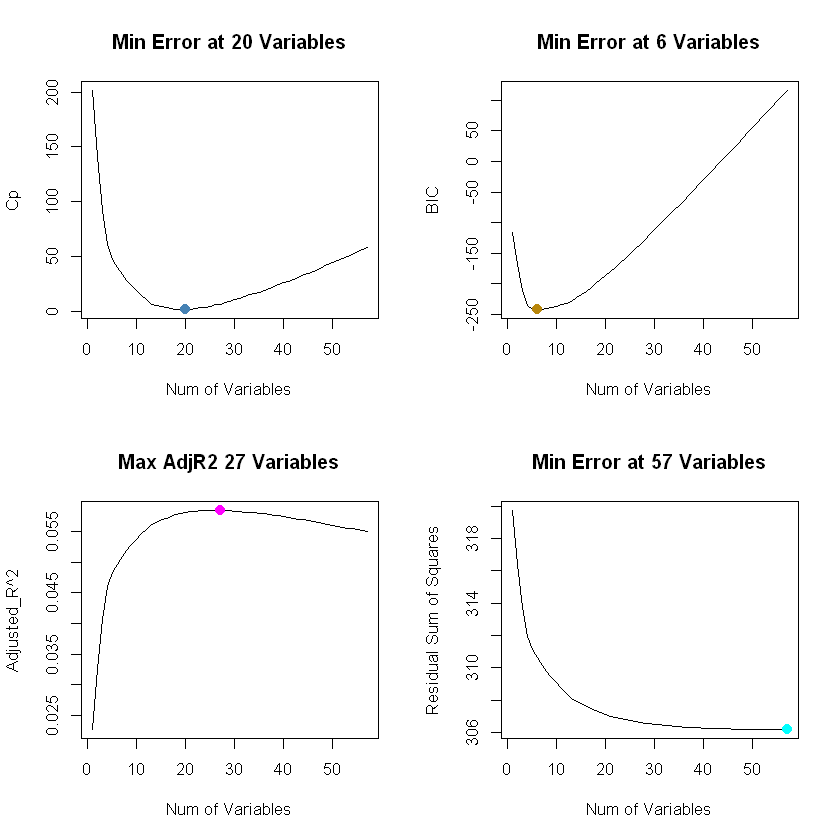

In [62]:
par(mfrow = c(2, 2))
plot(fwd_step_3_summ$cp,xlab = "Num of Variables", ylab = "Cp", type = "l", main = paste("Min Error at",which.min(fwd_step_3_summ$cp), "Variables"))
points(which.min(fwd_step_3_summ$cp), fwd_step_3_summ$cp[which.min(fwd_step_3_summ$cp)], col = "steelblue", cex = 2, pch = 20)

plot(fwd_step_3_summ$bic,xlab = "Num of Variables", ylab = "BIC", type = "l", main = paste("Min Error at",which.min(fwd_step_3_summ$bic), "Variables" ))
points(which.min(fwd_step_3_summ$bic), fwd_step_3_summ$bic[which.min(fwd_step_3_summ$bic)], col = "darkgoldenrod", cex = 2, pch = 20)

plot(fwd_step_3_summ$adjr2,xlab = "Num of Variables", ylab = "Adjusted_R^2", type = "l", main = paste("Max AdjR2",which.max(fwd_step_3_summ$adjr2), "Variables"))
points(which.max(fwd_step_3_summ$adjr2), fwd_step_3_summ$adjr2[which.max(fwd_step_3_summ$adjr2)], col = "magenta", cex = 2, pch = 20)

plot(fwd_step_3_summ$rss,xlab = "Num of Variables", ylab = "Residual Sum of Squares", type = "l", main = paste("Min Error at",which.min(fwd_step_3_summ$rss), "Variables"))
points(which.min(fwd_step_3_summ$rss), fwd_step_3_summ$rss[which.min(fwd_step_3_summ$rss)], col = "cyan", cex = 2, pch = 20)

After applying a forward step to the data in glm_3 model, there are 4 different suggestions of the possible predictors. By using Mallow Cp as the measure, the lowest error rate is in a model with __20 variables__. This result differs when measuring the error rate using BIC, which presents the model has lower __BIC error at 6 variables__. 

However, when measured by adjusted $R^2$, the higher $R^2$ means the model fits better, and the highest $R^2$ value is at __27 variables__.

On the contrary, when measured by RSS, the lowest value is at __57 variables__, again, this would be the original model before applying forward step function. Thus, the number of predictors based on RSS measurement will be discarded from further analysis.

#### Fitting logistic regression using 20 variables generated from the least Cp error of forward stepwise 

In [63]:
length(rownames(data.frame(coef(fwd_step_3,20)))[-1])
paste(rownames(data.frame(coef(fwd_step_3,20)))[-1], collapse = "+")

[1] 20

[1] "V6+V11+V16+V18+V21+V22+V28+V30+V41+V42+V43+V44+V47+V57+V58+V64+V67+V80+V82+V83"

In [64]:

glm_3_fwd_20 <- glm(V86 ~ V6+V11+V16+V18+V21+V22+V28+V30+V41+V42+V43+V44+V47+V57+V58+V64+V67+V80+V82+V83, 
    data= glm_3_data, 
    family = binomial(link = "logit"))

In [65]:
summary(glm_3_fwd_20)


Call:
glm(formula = V86 ~ V6 + V11 + V16 + V18 + V21 + V22 + V28 + 
    V30 + V41 + V42 + V43 + V44 + V47 + V57 + V58 + V64 + V67 + 
    V80 + V82 + V83, family = binomial(link = "logit"), data = glm_3_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.5664  -0.3776  -0.2575  -0.1766   3.0960  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -4.50037    0.44416 -10.132  < 2e-16 ***
V6          -0.08997    0.06105  -1.474   0.1406    
V11         -0.13330    0.06657  -2.002   0.0452 *  
V16          0.08693    0.04606   1.887   0.0591 .  
V18         -0.08864    0.04106  -2.159   0.0309 *  
V21         -0.16979    0.08183  -2.075   0.0380 *  
V22          0.06382    0.03205   1.991   0.0464 *  
V28          0.07607    0.04350   1.749   0.0804 .  
V30         -0.05438    0.02260  -2.406   0.0161 *  
V41         -0.25301    0.12066  -2.097   0.0360 *  
V42          0.11328    0.05470   2.071   0.0384 *  
V43          0.05599    0.

#### Fitting logistic regression using 6 variables generated from the least *BIC* error of forward stepwise 

In [66]:
length(rownames(data.frame(coef(fwd_step_3,6)))[-1])
paste(rownames(data.frame(coef(fwd_step_3,6)))[-1], collapse = "+")

[1] 6

[1] "V18+V43+V44+V47+V64+V82"

In [67]:
glm_3_fwd_6 <- glm(V86 ~ V18+V43+V44+V47+V64+V82, 
    data= glm_3_data, 
    family = binomial(link = "logit"))

In [68]:
summary(glm_3_fwd_6)


Call:
glm(formula = V86 ~ V18 + V43 + V44 + V47 + V64 + V82, family = binomial(link = "logit"), 
    data = glm_3_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.4754  -0.3886  -0.2708  -0.1870   3.1059  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -4.11397    0.26521 -15.512  < 2e-16 ***
V18         -0.10378    0.02852  -3.639 0.000273 ***
V43          0.12905    0.03200   4.033 5.50e-05 ***
V44          0.29248    0.05857   4.994 5.92e-07 ***
V47          0.22889    0.02383   9.606  < 2e-16 ***
V64          0.16582    0.08812   1.882 0.059867 .  
V82          2.04798    0.36998   5.535 3.11e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2635.5  on 5821  degrees of freedom
Residual deviance: 2372.2  on 5815  degrees of freedom
AIC: 2386.2

Number of Fisher Scoring iterations: 6


#### Fitting logistic regression using 27 variables generated from the max *Adjusted $R^2$* of forward stepwise 

In [69]:
length(rownames(data.frame(coef(fwd_step_3,27)))[-1])
paste(rownames(data.frame(coef(fwd_step_3,27)))[-1], collapse = "+")

[1] 27

[1] "V6+V9+V11+V16+V18+V21+V22+V28+V30+V32+V33+V34+V40+V41+V42+V43+V44+V47+V53+V57+V58+V64+V67+V80+V81+V82+V83"

In [70]:
glm_3_fwd_27 <- glm(V86 ~ V6+V9+V11+V16+V18+V21+V22+V28+V30+V32+V33+V34+V40+V41+V42+V43+V44+V47+V53+V57+V58+V64+V67+V80+V81+V82+V83, 
    data= glm_3_data, 
    family = binomial(link = "logit"))

In [71]:
summary(glm_3_fwd_27)


Call:
glm(formula = V86 ~ V6 + V9 + V11 + V16 + V18 + V21 + V22 + V28 + 
    V30 + V32 + V33 + V34 + V40 + V41 + V42 + V43 + V44 + V47 + 
    V53 + V57 + V58 + V64 + V67 + V80 + V81 + V82 + V83, family = binomial(link = "logit"), 
    data = glm_3_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.5659  -0.3794  -0.2566  -0.1725   3.1626  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -6.54729    1.33695  -4.897 9.72e-07 ***
V6           -0.10037    0.06187  -1.622  0.10472    
V9           -0.05218    0.03661  -1.425  0.15405    
V11          -0.12712    0.06850  -1.856  0.06350 .  
V16           0.08508    0.04668   1.823  0.06834 .  
V18          -0.08998    0.04162  -2.162  0.03064 *  
V21          -0.15370    0.08296  -1.853  0.06392 .  
V22           0.06195    0.03273   1.893  0.05834 .  
V28           0.07934    0.04421   1.794  0.07274 .  
V30          -0.04411    0.02393  -1.843  0.06527 .  
V32           0.27035 

Using the forward step method for feature selection then comparing the goodness of fit between the __20 variables model__, __27 variables model__, and __6 variables model__, the AIC score of the first model is lower than the second model with the lower score being __2356__. <h3>Thus, a model with 20 predictors is the best to make the prediction so far.</h3>

#### <ol><ol><ol>__BACKWARD STEP__</ol></ol></ol>

In [72]:
bckw_step_3 <- regsubsets(V86 ~ . , data = glm_3_data, nvmax = ncol(glm_3_data), method = "backward")

In [73]:
bckw_step_3_summ <- summary(bckw_step_3)

In [74]:
bckw_step_3_summ

Subset selection object
Call: regsubsets.formula(V86 ~ ., data = glm_3_data, nvmax = ncol(glm_3_data), 
    method = "backward")
57 Variables  (and intercept)
    Forced in Forced out
V1      FALSE      FALSE
V6      FALSE      FALSE
V7      FALSE      FALSE
V8      FALSE      FALSE
V9      FALSE      FALSE
V11     FALSE      FALSE
V12     FALSE      FALSE
V13     FALSE      FALSE
V14     FALSE      FALSE
V15     FALSE      FALSE
V16     FALSE      FALSE
V17     FALSE      FALSE
V18     FALSE      FALSE
V19     FALSE      FALSE
V20     FALSE      FALSE
V21     FALSE      FALSE
V22     FALSE      FALSE
V23     FALSE      FALSE
V24     FALSE      FALSE
V25     FALSE      FALSE
V26     FALSE      FALSE
V27     FALSE      FALSE
V28     FALSE      FALSE
V29     FALSE      FALSE
V30     FALSE      FALSE
V32     FALSE      FALSE
V33     FALSE      FALSE
V34     FALSE      FALSE
V35     FALSE      FALSE
V37     FALSE      FALSE
V38     FALSE      FALSE
V39     FALSE      FALSE
V40     FALSE   

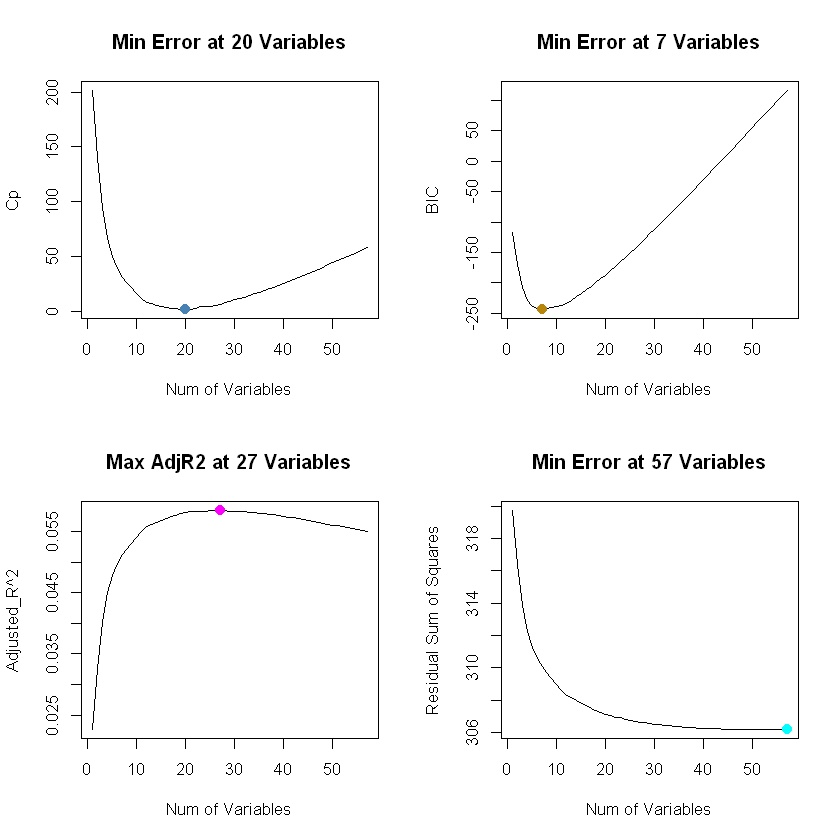

In [75]:
par(mfrow = c(2, 2))
plot(bckw_step_3_summ$cp,xlab = "Num of Variables", ylab = "Cp", type = "l", main = paste("Min Error at",which.min(bckw_step_3_summ$cp), "Variables"))
points(which.min(bckw_step_3_summ$cp), bckw_step_3_summ$cp[which.min(bckw_step_3_summ$cp)], col = "steelblue", cex = 2, pch = 20)

plot(bckw_step_3_summ$bic,xlab = "Num of Variables", ylab = "BIC", type = "l", main = paste("Min Error at",which.min(bckw_step_3_summ$bic), "Variables" ))
points(which.min(bckw_step_3_summ$bic), bckw_step_3_summ$bic[which.min(bckw_step_3_summ$bic)], col = "darkgoldenrod", cex = 2, pch = 20)

plot(bckw_step_3_summ$adjr2,xlab = "Num of Variables", ylab = "Adjusted_R^2", type = "l", main = paste("Max AdjR2 at",which.max(bckw_step_3_summ$adjr2), "Variables"))
points(which.max(bckw_step_3_summ$adjr2), bckw_step_3_summ$adjr2[which.max(bckw_step_3_summ$adjr2)], col = "magenta", cex = 2, pch = 20)

plot(bckw_step_3_summ$rss,xlab = "Num of Variables", ylab = "Residual Sum of Squares", type = "l", main = paste("Min Error at",which.min(bckw_step_3_summ$rss), "Variables"))
points(which.min(bckw_step_3_summ$rss), bckw_step_3_summ$rss[which.min(bckw_step_3_summ$rss)], col = "cyan", cex = 2, pch = 20)

After performing the backward step taken from glm_3 model, the lowest error when using Mallows' Cp happened at the same number of variable as performing forward step. The only difference is when measuring the error using BIC, in backward step, the lowest error rate is at 7 variables instead of 6 like the one in forward step.

In [76]:
length(rownames(data.frame(coef(bckw_step_3, 7)))[-1])
paste(rownames(data.frame(coef(bckw_step_3, 7)))[-1] , collapse = "+")

[1] 7

[1] "V18+V21+V30+V44+V47+V64+V82"

In [77]:
glm_3_bckw_7 <- glm(V86 ~ V18+V21+V30+V44+V47+V64+V82, data= glm_3_data, family = binomial(link="logit"))
summary(glm_3_bckw_7)


Call:
glm(formula = V86 ~ V18 + V21 + V30 + V44 + V47 + V64 + V82, 
    family = binomial(link = "logit"), data = glm_3_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.5799  -0.3874  -0.2725  -0.1849   3.0773  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.02353    0.17079 -17.703  < 2e-16 ***
V18         -0.11376    0.02684  -4.239 2.24e-05 ***
V21         -0.25013    0.07577  -3.301 0.000963 ***
V30         -0.08805    0.01972  -4.464 8.03e-06 ***
V44          0.27613    0.05877   4.698 2.62e-06 ***
V47          0.22778    0.02382   9.564  < 2e-16 ***
V64          0.16259    0.08838   1.840 0.065811 .  
V82          2.01432    0.37438   5.380 7.43e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2635.5  on 5821  degrees of freedom
Residual deviance: 2359.7  on 5814  degrees of freedom
AIC: 2375.7

Number of Fisher S

Clearly choosing backward step to do feature selection did not make a difference with doing forward step selection. Having 7 predictors in the model has increased the AIC score to 2375, which explains the goodness of the model had decreased from having a model with 20 predictors like the one performed in forward step selection.

#### <ol><ol><ol>__LASSO REGRESSION__</ol></ol></ol>

In [78]:
glm_3_train_x <- model.matrix(V86 ~ . , data = glm_3_data)[, -1]
glm_3_train_y <- glm_3_data$V86

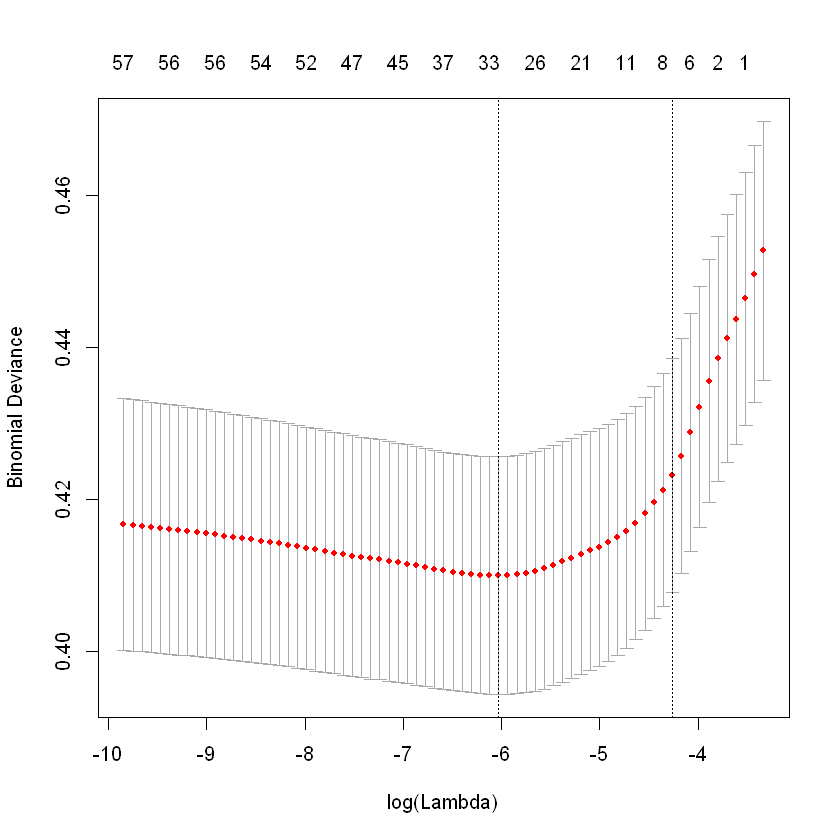

In [79]:
set.seed(1234)

cv.lasso_3 <- cv.glmnet(glm_3_train_x, glm_3_train_y, alpha = 1, family = "binomial")
plot(cv.lasso_3)

The plot shows the error of lambda using the cross-validation. From the graph, it can be seen that roughly the log of lambda that minimises the error is at -6. The recommended log of lambda value gives the most accurate model compared to others. The exact number of lambda can be seen from the code below.

In [80]:
lasso_3_min_lambda <- cv.lasso_3$lambda.min
# coef(cv.lasso_3, cv.lasso_3$lambda.min)
lasso_3_min_lambda

[1] 0.002409183

In [81]:
lasso_3_model <- glmnet(glm_3_train_x, glm_3_train_y, alpha = 1, family = "binomial", lambda = lasso_3_min_lambda)
coef(lasso_3_model)[,1]

(Intercept)           V1           V6           V7           V8           V9 
-4.342725977  0.000000000 -0.026361895  0.017726633  0.000000000 -0.017889156 
         V11          V12          V13          V14          V15          V16 
-0.074628594 -0.012169064  0.000000000  0.000000000  0.000000000  0.050309687 
         V17          V18          V19          V20          V21          V22 
 0.000000000 -0.045986292  0.000000000  0.000000000 -0.125935543  0.032852074 
         V23          V24          V25          V26          V27          V28 
 0.000000000  0.000000000  0.000000000  0.000000000  0.000000000  0.000000000 
         V29          V30          V32          V33          V34          V35 
-0.013364938 -0.029926333  0.052646488  0.000000000  0.000000000  0.000000000 
         V37          V38          V39          V40          V41          V42 
-0.009472054  0.000000000  0.000000000  0.029389632 -0.100102972  0.051889750 
         V43          V44          V45          V47          V49          V50 
 0.050470673  0.187998189  0.000000000  0.210076411  0.000000000  0.000000000 
         V51          V53          V55          V56          V57          V58 
 0.016906391 -0.066510903  0.000000000  0.000000000  0.118771672  0.194513270 
         V64          V67          V69          V73          V75          V80 
 0.107982655 -0.256910437  0.000000000 -0.044825320 -0.061312506  0.154281973 
         V81          V82          V83          V84 
 0.928678595  1.891697774  0.352759213  0.000000000

In [82]:
# predict(lasso_3_model, glm_3_test_x, )

After applying L1-norm regularisation to the model taken from the glm_3, there are 26 variables that have the coefficient of 0, thus these variables can be discarded, while the others will be kept to get the fitness of a model.
* DISCARD: V1, V8, V13, V14, V15, V17, V19, V20, V23, V24, V25, V26, V27, V28, V33, V34, V35, V38, V39, V45, V49, V50, V55, V56, V69, V84
* KEEP: V6, V7, V9, V11, V12, V16, V18, V21, V22, V29, V30, V32, V37, V40, V41, V42, V43, V44, V47, V51, V53, V57, V58, V64, V67, V73, V75, V80, V81, V82, V83

In [83]:
lasso_3_coef <- data.frame("coef" = coef(lasso_3_model)[,1])
lasso_3_var <- paste(rownames(lasso_3_coef[lasso_3_coef$coef != 0, , drop=F][-1, ,drop=F]) , collapse = "+", sep = "")
lasso_3_var

[1] "V6+V7+V9+V11+V12+V16+V18+V21+V22+V29+V30+V32+V37+V40+V41+V42+V43+V44+V47+V51+V53+V57+V58+V64+V67+V73+V75+V80+V81+V82+V83"

In [84]:
glm_3_lasso <- glm(V86 ~ V6+V7+V9+V11+V12+V16+V18+V21+V22+V29+V30+V32+V37+
                           V40+V41+V42+V43+V44+V47+V51+V53+V57+V58+V64+V67+V73+V75+V80+V81+V82+V83
                   , data = glm_3_data, 
                   family = binomial(link = "logit"))

In [85]:
glm_3_lasso_sum <- summary(glm_3_lasso)
glm_3_lasso_sum


Call:
glm(formula = V86 ~ V6 + V7 + V9 + V11 + V12 + V16 + V18 + V21 + 
    V22 + V29 + V30 + V32 + V37 + V40 + V41 + V42 + V43 + V44 + 
    V47 + V51 + V53 + V57 + V58 + V64 + V67 + V73 + V75 + V80 + 
    V81 + V82 + V83, family = binomial(link = "logit"), data = glm_3_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.5928  -0.3806  -0.2573  -0.1721   3.1492  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -4.211132   0.778003  -5.413 6.21e-08 ***
V6           -0.101226   0.077108  -1.313  0.18926    
V7           -0.003291   0.065079  -0.051  0.95967    
V9           -0.050982   0.062270  -0.819  0.41295    
V11          -0.118445   0.067842  -1.746  0.08083 .  
V12          -0.021359   0.043601  -0.490  0.62423    
V16           0.067747   0.045334   1.494  0.13508    
V18          -0.045748   0.037791  -1.211  0.22607    
V21          -0.179407   0.080920  -2.217  0.02662 *  
V22           0.052347   0.032622   1.605  

#### GOODNESS OF MODEL COMPARISON BETWEEN MODEL FITTING FOR DIFFERENT NUMBER OF PREDICTORS AND TECHNIQUES

In [86]:
# AIC score from glm_1
summary(glm_1)$aic

# AIC score from glm_2
summary(glm_2)$aic

# AIC score from glm_3
summary(glm_3)$aic

# AIC score from glm_3 with forward step
summary(glm_3_fwd_20)$aic
summary(glm_3_fwd_27)$aic
summary(glm_3_fwd_6)$aic

# AIC score from glm_3 with backward step
summary(glm_3_bckw_7)$aic

#AIC score from glm_3 with lasso regularisation
summary(glm_3_lasso)$aic

[1] 2428.757

[1] 2415.486

[1] 2407.877

[1] 2356.085

[1] 2359.796

[1] 2386.174

[1] 2375.667

[1] 2370.507

Above is the summary of different number of AIC score using different number of predictors and techniques. The result for each experiment is explained below.
* AIC score from glm_1 -> Using 8 variables taken from the high number of standard deviation of the predictors
    * __2428.75__
* AIC score from glm_2 -> Using all variables in the dataset as the predictors
    * __2415.49__
* AIC score from glm_3 -> Using variables from the ones that have been excluded due to multicollinearity, and high correlation towards the response variable
    * __2407.88__
* AIC score from glm_3_fwd_20 with forward step -> Using number of variables taken from the forward step techniques which have lowest Mallows' Cp error
    * __2356.08__
* AIC score from glm_3_fwd_27 with forward step -> Using number of variables taken from the forward step techniques which have highest Adjusted $R^2$
    * __2359.79__
* AIC score from glm_3_fwd_6 with forward step -> Using number of variables taken from the forward step techniques which have lowest Residual Sum of Squared Error
    * __2386.17__
* AIC score from glm_3_bckw_7 with backward step -> Using number of variables taken from the backward step techniques which have lowest BIC Error
    * __2375.66__
* AIC score from glm_3_lasso -> Using number of variables taken after performing lasso regression to the glm_3 data
    * __2370.51__

In [87]:
test_data_complete <- data.frame(cbind(test_data[ , colnames(test_data) %in% colnames(glm_3_data)], targets))
colnames(test_data_complete)[ncol(test_data_complete)] <- "V86"

## 3.) Prediction

#### 3.1) Predicting using glm_3_fwd_27 model

In [88]:
glm_3_test <- data.frame(cbind(test_data[ , colnames(test_data) %in% (variable.names(glm_3_fwd_27)[-1])] , targets))
colnames(glm_3_test)[ncol(glm_3_test)] <- "V86"

glm_3_test_x <- glm_3_test[ , 1:(ncol(glm_3_test)-1)] #model.matrix(V86 ~ . , data = glm_3_test)[ , -1] 
glm_3_test_y <- glm_3_test[ , "V86"]

glm_3_probs <- predict(glm_3_fwd_27, glm_3_test_x , type = "response")

In [89]:
prob_seq <- seq(0,0.5, by = 0.005)
prob_seq
pred.glm_3_df <- data.frame("prob" = prob_seq, "sensitivity" = 0, "specificity" = 0, accuracy = 0)
pred.num_cust <- data.frame("prob" = prob_seq, "num_of_customer" = 0)

[1] 0.000 0.005 0.010 0.015 0.020 0.025 0.030 0.035 0.040 0.045 0.050 0.055
 [13] 0.060 0.065 0.070 0.075 0.080 0.085 0.090 0.095 0.100 0.105 0.110 0.115
 [25] 0.120 0.125 0.130 0.135 0.140 0.145 0.150 0.155 0.160 0.165 0.170 0.175
 [37] 0.180 0.185 0.190 0.195 0.200 0.205 0.210 0.215 0.220 0.225 0.230 0.235
 [49] 0.240 0.245 0.250 0.255 0.260 0.265 0.270 0.275 0.280 0.285 0.290 0.295
 [61] 0.300 0.305 0.310 0.315 0.320 0.325 0.330 0.335 0.340 0.345 0.350 0.355
 [73] 0.360 0.365 0.370 0.375 0.380 0.385 0.390 0.395 0.400 0.405 0.410 0.415
 [85] 0.420 0.425 0.430 0.435 0.440 0.445 0.450 0.455 0.460 0.465 0.470 0.475
 [97] 0.480 0.485 0.490 0.495 0.500

In [90]:
for (i in 1:length(prob_seq)){
    pred.glm_3 <- rep(0, length(glm_3_probs))
    pred.glm_3[glm_3_probs > prob_seq[i]] <- 1
    pred.glm_3_df[pred.glm_3_df$prob == prob_seq[i], "sensitivity"] <- sensitivity(as.factor(pred.glm_3), as.factor(glm_3_test_y), positive = "1")
    pred.glm_3_df[pred.glm_3_df$prob == prob_seq[i], "specificity"] <- sensitivity(as.factor(pred.glm_3), as.factor(glm_3_test_y), positive = "0")
    pred.glm_3_df[pred.glm_3_df$prob == prob_seq[i], "accuracy"] <- mean(pred.glm_3 == glm_3_test_y)
    
    pred.num_cust[pred.num_cust$prob == prob_seq[i], "num_of_customer"] <- sum(pred.glm_3)
}

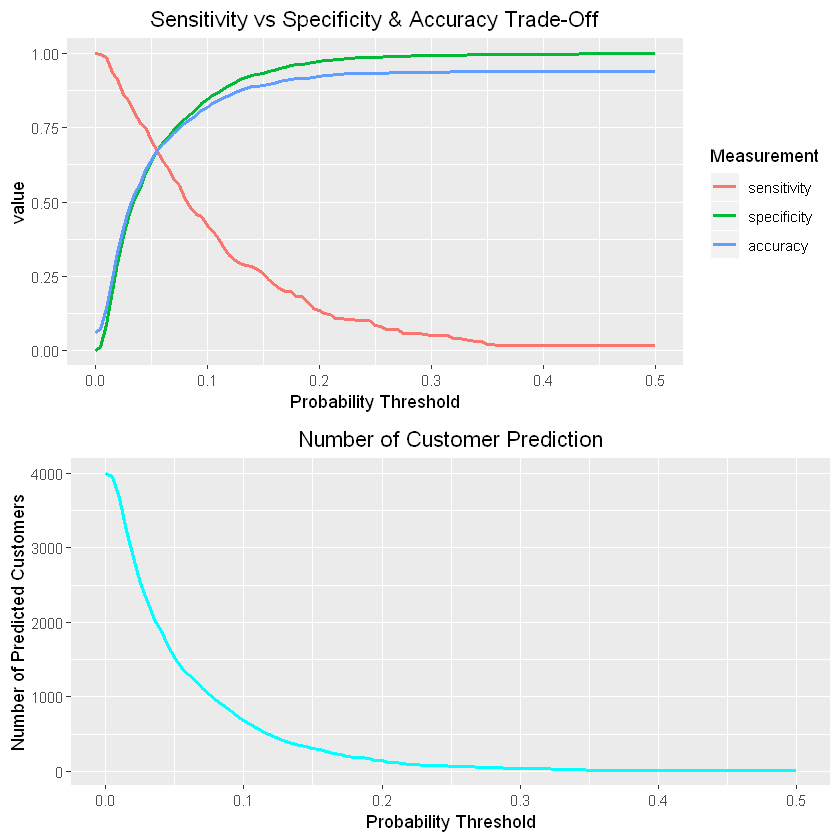

In [91]:
pred.glm_3_df_m <- melt(pred.glm_3_df, id = "prob")
plot_1 <- ggplot(pred.glm_3_df_m, aes(x = prob, y = value))+
    geom_line(aes(col = variable), size = 0.9)+
    ggtitle("Sensitivity vs Specificity & Accuracy Trade-Off") +
    scale_color_discrete("Measurement") +
    scale_x_continuous("Probability Threshold") +
    theme(plot.title = element_text(hjust = 0.5))

plot_2 <- ggplot(pred.num_cust, aes(x = prob, y = num_of_customer))+
    geom_line(size = 0.9, col="cyan")+
    ggtitle("Number of Customer Prediction") +
    theme(plot.title = element_text(hjust = 0.5)) +
    scale_x_continuous("Probability Threshold") +
    scale_y_continuous("Number of Predicted Customers")
grid.arrange(plot_1, plot_2, nrow=2)

The *first* plot above shows the trade off between sensitivity (True Positive) and specificity (True Negative) trade off for prediction probability threshold 0 to 0.5. The true positive in this case is the customers who actually purchased the caravan policy, and correctly predicted. While the true negative are the ones who did not buy caravan policy and predicted that they indeed did not buy policy.

When we set the predicted probability threshold to 0, the sensitivity for positive = 1 had its peak, because we force all the value to 1, but the trade off happened to the overall accuracy of the model which only had around 6%.

When the probability for prediction set to 0.1, the sensitivity for the positive = 1 increased, but the specificity becomes low. Lastly, when prediction probability set to 0.5, the sensitivity becomes low while the specificity gets higher. If we set the probability to 0.1, that means we would get more number of potential customers but with lower probability, and if we set the probability to 0.5, there is a higher probability with lower number of customers. 

The *second* plot shows the number of predicted customers who will buy caravan policy for different probability threshold. It can be observed that when the threshold is low, all customers are predicted to buy the policy, and this number decreased if the threshold increased. In order to get prediction of roughly 800 customers, the threshold lies between __0.05 and 0.1__. Thus we can estimate the true threshold between this range.

In [92]:
glm_3_probs <- predict(glm_3_fwd_27, glm_3_test_x , type = "response")
range(glm_3_probs)

pred.glm_3 <- rep(0, length(glm_3_probs))
pred.glm_3[glm_3_probs > 0.092] <- 1


cm.glm_3 <- confusionMatrix(table(pred.glm_3, glm_3_test_y) , positive = "1")
cm.glm_3

[1] 2.220446e-16 8.986516e-01

Confusion Matrix and Statistics

          glm_3_test_y
pred.glm_3    0    1
         0 3071  129
         1  691  109
                                          
               Accuracy : 0.795           
                 95% CI : (0.7822, 0.8074)
    No Information Rate : 0.9405          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.1303          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.45798         
            Specificity : 0.81632         
         Pos Pred Value : 0.13625         
         Neg Pred Value : 0.95969         
             Prevalence : 0.05950         
         Detection Rate : 0.02725         
   Detection Prevalence : 0.20000         
      Balanced Accuracy : 0.63715         
                                          
       'Positive' Class : 1               
                                          

With the predicted probability threshold of __0.092 (9.2%)__ ranging from __2.22044604925031e-16__ to __0.898651639492281__, it can be summarised:
* The total customers who were predicted 1 (True Positive + True Negative) is equal to __800__
* The Number of customers who were predicted to buy the policy and actually bought the policy (True Positive) is __109__, with Sensitivity of __0.458 (46%)__. 
    * This means almost half of the actual customers who bought the policy were correctly predicted.
* The Overall accuracy of the model is __0.795 (80%)__

#### 3.2) Predicting using glm_3_fwd_20 model

In [93]:
test_20var <- cbind(test_data[ , colnames(test_data) %in% variable.names(glm_3_fwd_20)[-1]] , targets)
colnames(test_20var)[ncol(test_20var)] <- "V86"

test_20var_x <- test_20var[ , -ncol(test_20var)]
test_20var_y <- test_20var[ , ncol(test_20var)]

probs.20var <- predict(glm_3_fwd_20 , test_20var_x , type = "response")

range(probs.20var)

pred.20var <- rep(0, length(probs.20var))
pred.20var[probs.20var > 0.0906] <- 1
sum(pred.20var)

cm.20var <- confusionMatrix(table(pred.20var, test_20var_y) , positive = "1")
cm.20var

[1] 0.002095697 0.901412847

[1] 800

Confusion Matrix and Statistics

          test_20var_y
pred.20var    0    1
         0 3075  125
         1  687  113
                                          
               Accuracy : 0.797           
                 95% CI : (0.7842, 0.8094)
    No Information Rate : 0.9405          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.1387          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.47479         
            Specificity : 0.81738         
         Pos Pred Value : 0.14125         
         Neg Pred Value : 0.96094         
             Prevalence : 0.05950         
         Detection Rate : 0.02825         
   Detection Prevalence : 0.20000         
      Balanced Accuracy : 0.64609         
                                          
       'Positive' Class : 1               
                                          

Although by using 20 variables to fit the model gives the lowest AIC score compared to all, it does not prove that the prediction will get better. It can be seen that using 20 variable model, the probability threshold needed to be set a little bit lower than the model using 27 variables in order to get 800 predicted customers. With that being said, the sensitivity had gone up by 2% from the previous model. This means although the probability threshold was lower, the model had more correct prediction than 27 variables model.

#### 3.3) Predicting using Lasso

In [94]:
lasso_test <- data.frame(cbind(test_data, targets))
colnames(lasso_test)[ncol(lasso_test)] <- "V86"

lasso_test_x <- model.matrix(V86 ~ ., data = lasso_test)[ ,-1]
lasso_test_x <- lasso_test_x[,colnames(lasso_test_x) %in% rownames(coefficients(lasso_3_model))[-1]]

lasso_test_y <- lasso_test[,ncol(lasso_test)]

In [95]:
lasso_probs <- predict(lasso_3_model ,newx = lasso_test_x, type = "response")

In [96]:
summary(lasso_probs)

       s0          
 Min.   :0.004671  
 1st Qu.:0.021916  
 Median :0.041473  
 Mean   :0.058782  
 3rd Qu.:0.077585  
 Max.   :0.834055  

In [97]:
pred.lasso_glm_3 <- rep(0, length(lasso_probs))
pred.lasso_glm_3[lasso_probs > 0.0889] <- 1
sum(pred.lasso_glm_3)
confusionMatrix(table(pred.lasso_glm_3, glm_3_test_y), positive = "1")

[1] 799

Confusion Matrix and Statistics

                glm_3_test_y
pred.lasso_glm_3    0    1
               0 3076  125
               1  686  113
                                          
               Accuracy : 0.7972          
                 95% CI : (0.7845, 0.8096)
    No Information Rate : 0.9405          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.139           
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.47479         
            Specificity : 0.81765         
         Pos Pred Value : 0.14143         
         Neg Pred Value : 0.96095         
             Prevalence : 0.05950         
         Detection Rate : 0.02825         
   Detection Prevalence : 0.19975         
      Balanced Accuracy : 0.64622         
                                          
       'Positive' Class : 1               
                                        

Using lasso regression the probability threshold had to be lowered down a little bit in order to get the expected 800 customers who would buy the caravan policy. There is a probability of __0.0889 (8.89%)__ to get __799 customers__ when predicting using this model. This model predicted lower probability compared to the previous one with 9.2% to get predicted 800 customers. On the other hand, the number of customers who were correctly predicted was higher in lasso regression compared to the previous model. Lasso had a true positive of 113 customers, while the previous model had a true positive of 109 customers.

#### 3.4) Predicting using Ridge Regression

Trying to improve from 27 variable model.

In [98]:
# get variable from 27 variables model
ridge_train <- train_data[ , colnames(train_data) %in% c(variable.names(glm_3_fwd_27)[-1], "V86")]
ridge_train_x <- model.matrix(V86 ~ . , data = ridge_train)[,-1]
ridge_train_y <- ridge_train[,"V86"]

ridge_test <- data.frame(cbind(test_data,targets))
colnames(ridge_test)[ncol(ridge_test)] <- "V86"
ridge_test_x <- ridge_test[ , colnames(ridge_test) %in% c(variable.names(glm_3_fwd_27)[-1] , "V86")]
ridge_test_x <- model.matrix(V86 ~ . , data = ridge_test_x)[,-1]
ridge_test_y <- ridge_test[,"V86"]

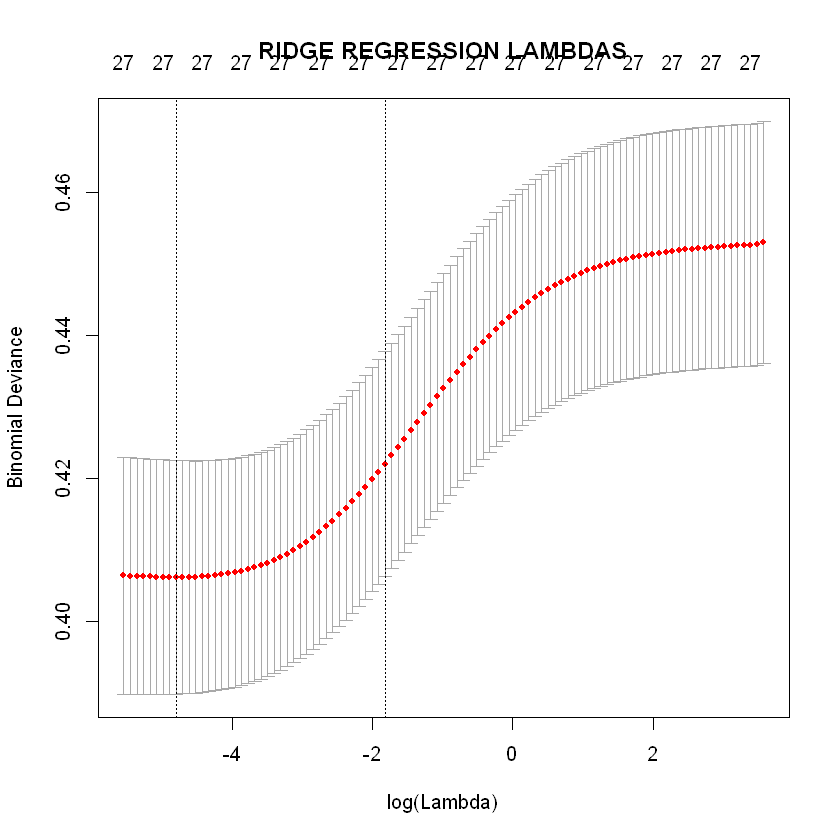

In [99]:
set.seed(1234)

cv.ridge_3 <- cv.glmnet(ridge_train_x, ridge_train_y, alpha = 0, family = "binomial")

plot(cv.ridge_3, main = "RIDGE REGRESSION LAMBDAS")

In [100]:
ridge_3_min_lambda <- cv.ridge_3$lambda.min
ridge_3_min_lambda

[1] 0.008264629

In [101]:
ridge_3_model <- glmnet(ridge_train_x, ridge_train_y, alpha = 0, family = "binomial", lambda = ridge_3_min_lambda)
coefficients(ridge_3_model)[,1]

(Intercept)           V6           V9          V11          V16          V18 
-4.513832384 -0.077079359 -0.047567572 -0.100279295  0.073366498 -0.064938500 
         V21          V22          V28          V30          V32          V33 
-0.135805399  0.053402685  0.046068071 -0.036478053  0.070715813  0.038149538 
         V34          V40          V41          V42          V43          V44 
-0.006868563  0.048157427 -0.166901434  0.063797754  0.052751901  0.185547803 
         V47          V53          V57          V58          V64          V67 
 0.191331830 -0.381715871  0.183024720  0.241924187  0.135520320 -0.603737941 
         V80          V81          V82          V83 
 0.210226367  1.367732453  1.977475253  0.417052201

As can be seen, the ridge regression did not force any variables to absolute zero, rather than put penalty into approaching zero.

In [102]:
ridge.predict <- predict(ridge_3_model ,newx = ridge_test_x, type = "response")
range(ridge.predict)

[1] 0.002516325 0.865099610

In [103]:
ridge.probs <- rep(0, length(ridge.predict))
ridge.probs[ridge.predict > 0.0865] <- 1
sum(ridge.probs)
confusionMatrix(table(ridge.probs, ridge_test_y), positive = "1")

[1] 799

Confusion Matrix and Statistics

           ridge_test_y
ridge.probs    0    1
          0 3068  133
          1  694  105
                                          
               Accuracy : 0.7932          
                 95% CI : (0.7804, 0.8057)
    No Information Rate : 0.9405          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.122           
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.44118         
            Specificity : 0.81552         
         Pos Pred Value : 0.13141         
         Neg Pred Value : 0.95845         
             Prevalence : 0.05950         
         Detection Rate : 0.02625         
   Detection Prevalence : 0.19975         
      Balanced Accuracy : 0.62835         
                                          
       'Positive' Class : 1               
                                          

Above is the summary statistic of prediction versus the truth using ridge regression which was the improvement of 27 variable model generated by forward step. Essentially, this part differentiates the model between logistic regression and ridge regression using the same number of predictors. Because the coefficients have been penalised due to ridge regression nature, the model had become less accurate. The ridge regression predicted that with the probability of __0.0865 (8.65%)__ there are __799 customers__ who would buy caravan policy. And within that number of customers, there are __105 customers__ who turned out bought the policy. This makes the sensitivity of this model is the lowest compared to the other 2 predictions made in the previous steps.

### PREDICTION COMPARISON SUMMARY
1. __Prediction 1__ (Logistic Regression with 27 variables taken from forward step)
    * Overall Accuracy: 0.795
    * Probability threshold / boundary: 0.092
    * Total number of predicted customers: 800
    * Number of Correctly predicted (True Positive - predict 1 ; true 1): 109
    * Number of Incorrectly predicted (False Positive - predict 1 ; true 0): 691
    * Sensitivity: 0.45798
2. __Prediction 2__ (Logistic Regression with 20 variables taken from forward step)
    * Overall Accuracy: 0.797
    * Probability threshold / boundary: 0.0906
    * Total number of predicted customers: 800
    * Number of Correctly predicted (True Positive - predict 1 ; true 1): 113
    * Number of Incorrectly predicted (False Positive - predict 1 ; true 0): 687
    * Sensitivity: 0.47479
3. __Prediction 3__ (Lasso Regression with 57 variables from excluding multicollinearity and including high response variable correlation)
    * Overall Accuracy: 0.7972
    * Probability threshold / boundary: 0.0889
    * Total number of predicted customers: 799
    * Number of Correctly predicted (True Positive - predict 1 ; true 1): 113
    * Number of Incorrectly predicted (False Positive - predict 1 ; true 0): 686
    * Sensitivity: 0.47479
4. __Prediction 4__ (Ridge Regression with 27 variables taken from forward step)
    * Overall Accuracy: 0.7932
    * Probability threshold / boundary: 0.0865
    * Total number of predicted customers: 799
    * Number of Correctly predicted (True Positive - predict 1 ; true 1): 105
    * Number of Incorrectly predicted (False Positive - predict 1 ; true 0): 694
    * Sensitivity: 0.44118

####  In general, we want a prediction that has as high probability threshold as possible, with high number of correctly predicted, which resulted in higher sensitivity. From the prediction summary of 4 tested types of model types, Prediction 4 using Ridge Regression had the lowest Overall Accuracy, Probability Threshold, as well as the number of correctly predicted. Thus, this prediction does not have a good result. 

#### The second lowest prediction is Prediction 1 which used Logistic Regression using 27 variables taken from forward step feature selection. Although the probability threshold of this model is the highest compared to the others, it only gave 109 correctly predicted customers out of 800. This means there was a trade off of a higher probability to get 800 customers, but fewer people who got correctly predicted. And in general we wanted to pump up this number.

#### Prediction 2 using Logistic regression using 20 variables taken from lowest Cp Error in forward step and Prediction 3 using Lasso Regression are NECK AND NECK. They were both had the same overall accuracy of 0.7972, they had the same correctly predicted 113 customers out of roughly 800 customers, and following that they both had the same sensitivity rate. The only difference is the probability threshold between them. The Prediction 3 of Lasso only had 0.0889 chance that the predicted number of customers were correct. Meanwhile, Prediction 2 of Logistic Regression had a higher chance with 0.0906 that the prediction was correct. To put it into perspective, people would prefer 9.1% chance of getting the prediction correct rather than only 8.9%. 

#### By comparing these 4 predictions, Prediction 2 come up as the winner compared to the other 3.

## 4.) Why customers buy caravan policy

In [104]:
best.pred_x <- test_20var_x[pred.20var == 1 , ]
dim(best.pred_x)
head(best.pred_x)

[1] 800  20

,V6,V11,V16,V18,V21,V22,V28,V30,V41,V42,V43,V44,V47,V57,V58,V64,V67,V80,V82,V83
2,0,2,5,0,0,4,2,3,0,6,8,2,6,0,0,0,0,1,0,0
3,1,2,2,4,1,3,2,1,0,3,5,2,6,0,0,0,0,1,0,0
7,2,0,1,4,0,3,4,8,0,3,5,2,6,0,0,0,0,1,0,0
10,0,0,2,5,0,5,5,0,0,4,8,2,0,0,0,3,0,1,0,0
12,2,0,1,4,0,4,4,5,1,5,3,2,6,0,0,4,0,0,0,0
18,0,0,0,5,0,3,5,3,0,3,5,2,6,0,0,0,0,1,0,0


In [105]:
combined_all <- cbind(test_20var , pred.20var)
colnames(combined_all)[ncol(combined_all)] <- "predV86"

# Number of predicted customers
dim(combined_all[combined_all$predV86 == 1,])
head(combined_all[combined_all$predV86 == 1,])

[1] 800  22

,V6,V11,V16,V18,V21,V22,V28,V30,V41,V42,⋯,V47,V57,V58,V64,V67,V80,V82,V83,V86,predV86
2,0,2,5,0,0,4,2,3,0,6,,6,0,0,0,0,1,0,0,1,1
3,1,2,2,4,1,3,2,1,0,3,,6,0,0,0,0,1,0,0,0,1
7,2,0,1,4,0,3,4,8,0,3,,6,0,0,0,0,1,0,0,0,1
10,0,0,2,5,0,5,5,0,0,4,,0,0,0,3,0,1,0,0,0,1
12,2,0,1,4,0,4,4,5,1,5,,6,0,0,4,0,0,0,0,1,1
18,0,0,0,5,0,3,5,3,0,3,,6,0,0,0,0,1,0,0,0,1


In [106]:
# Customers that are Correctly predicted
true_pos <- combined_all[combined_all$V86 == combined_all$predV86 & combined_all$V86 == 1,]
dim(true_pos)
head(true_pos)

[1] 113  22

,V6,V11,V16,V18,V21,V22,V28,V30,V41,V42,⋯,V47,V57,V58,V64,V67,V80,V82,V83,V86,predV86
2,0,2,5,0,0,4,2,3,0,6,,6,0,0,0,0,1,0,0,1,1
12,2,0,1,4,0,4,4,5,1,5,,6,0,0,4,0,0,0,0,1,1
30,1,1,7,1,0,1,1,0,1,7,,5,0,0,0,0,1,0,0,1,1
89,1,1,3,2,0,5,2,1,0,4,,6,0,0,4,0,2,0,0,1,1
92,1,0,3,1,0,2,0,0,0,5,,6,3,0,0,0,1,0,0,1,1
210,2,0,4,0,0,3,0,0,0,5,,6,0,0,0,0,1,0,0,1,1


In [107]:
final_attributes <- data.frame(final_coef = coefficients(glm_3_fwd_20))
final_attributes <- final_attributes[rownames(final_attributes)[-1], , drop=F]
final_attributes$varname <- rownames(final_attributes)
rownames(final_attributes) <- NULL
final_attributes[order(final_attributes$final_coef,decreasing = T),]

,final_coef,varname
19,2.11335115,V82
20,0.45942262,V83
15,0.24909061,V58
18,0.24399681,V80
13,0.23159790,V47
12,0.18727887,V44
14,0.18168184,V57
16,0.12906573,V64
10,0.11328003,V42
3,0.08692732,V16


Based on the coefficients above, there are some variables that are highly impacted the decision on why customers bought caravan policy. In general the rule is to maximise the variables that have high positive number, and minimise the ones that have the lowest negative coefficients. By applying this rule, the probability will be likely to pass the predicted probability threshold in the chosen model. And if it passed the probability threshold, then it will be converted into 1 which will predict that the specific customer will buy the caravan policy.

__The variables that need to be maximised are:__
<br>*Note: in order of importance*
* V82 -> __Number of boat policies__
* V83 -> __Average income__
* V58 -> __Contribution disability insurance policies__
* V80 -> __Number of fire policies__
* V47 -> __Contribution car policies__
* V44 -> __Contribution private third party insurance__
* V57 -> __Contribution family accidents insurance policies__
* V64 -> __Contribution social security insurance policies__
* V42 -> __Average income__
* V16 -> __High level of education__
* V28 -> __Social class C__
* V22 -> __Middle management__
* V43 -> __Purchasing power class__

__And the variables that need to be minimised are:__
<br>*Note: in order of importance*
* V67 -> __Number of third party insurance (agriculture)__
* V41 -> __Income >123,000__
* V21 -> __Farmer__
* V11 -> __Living together__
* V6 -> __Roman catholic__
* V18 -> __Lower level education__
* V30 -> __Rented house__

For instance, V82 really high positive impact on the prediction to get above the probability threshold. In the data, V82(Number of boat policies) has a range between __0 to 9__. When maximising this variable, this means that the company should find those customers who have the number of boat policies on __upper range__, either 8 or 9. On the contrary, the company should find customers with V67(Number of third party insurance(agriculture)) to be at the lowest range as possible. The suggestion would be find those customers who have few to None third party insurance (agriculture), because if this variable is high, it would lower the probability to get to the probability threshold.